<a href="https://colab.research.google.com/github/hauledata/YouTube-Content-Trend-Analysis/blob/main/Final_Youtube.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cài đặt

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gdown
import plotly.express as px
from datetime import datetime as datetime
from scipy import stats
import matplotlib.lines as mlines

In [ ]:
#down tệp vào google colab
# https://drive.google.com/file/d/1PPVpY0Zxsnu3gRx2hNIvP_wONvwquy_B/view?usp=drive_link
file_id = "1PPVpY0Zxsnu3gRx2hNIvP_wONvwquy_B"
file_path = f"/content/{file_id}.csv"
!gdown --id $file_id -O $file_path

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1PPVpY0Zxsnu3gRx2hNIvP_wONvwquy_B
To: /content/1PPVpY0Zxsnu3gRx2hNIvP_wONvwquy_B.csv
100% 200k/200k [00:00<00:00, 43.3MB/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
yt_df = pd.read_csv(r'/content/1PPVpY0Zxsnu3gRx2hNIvP_wONvwquy_B.csv', encoding = 'latin-1')
yt_df.head()

rank                    Youtuber  subscribers   video views  \
0     1                    T-Series    245000000  2.280000e+11   
1     2              YouTube Movies    170000000  0.000000e+00   
2     3                     MrBeast    166000000  2.836884e+10   
3     4  Cocomelon - Nursery Rhymes    162000000  1.640000e+11   
4     5                   SET India    159000000  1.480000e+11   

           category                       Title  uploads        Country  \
0             Music                    T-Series    20082          India   
1  Film & Animation               youtubemovies        1  United States   
2     Entertainment                     MrBeast      741  United States   
3         Education  Cocomelon - Nursery Rhymes      966  United States   
4             Shows                   SET India   116536          India   

  Abbreviation   channel_type  ...  subscribers_for_last_30_days  \
0           IN          Music  ...                     2000000.0   
1           US          Games  ...                           NaN   
2           US  Entertainment  ...                     8000000.0   
3           US      Education  ...                     1000000.0   
4           IN  Entertainment  ...                     1000000.0   

   created_year  created_month  created_date  \
0        2006.0            Mar          13.0   
1        2006.0            Mar           5.0   
2        2012.0            Feb          20.0   
3        2006.0            Sep           1.0   
4        2006.0            Sep          20.0   

   Gross tertiary education enrollment (%)    Population  Unemployment rate  \
0                                     28.1  1.366418e+09               5.36   
1                                     88.2  3.282395e+08              14.70   
2                                     88.2  3.282395e+08              14.70   
3                                     88.2  3.282395e+08              14.70   
4                                     28.1  1.366418e+09               5.36   

   Urban_population   Latitude  Longitude  
0       471031528.0  20.593684  78.962880  
1       270663028.0  37.090240 -95.712891  
2       270663028.0  37.090240 -95.712891  
3       270663028.0  37.090240 -95.712891  
4       471031528.0  20.593684  78.962880  

[5 rows x 28 columns]

## 1. Mô tả dữ liệu

---


* rank: Xếp hạng của kênh Youtube dựa trên số lượng người đăng ký kênh

* Youtuber: Tên của kênh Youtube

* subscribers: Số lượng người đăng ký theo dõi kênh

* video views: Tổng số lượt xem trên tất cả video của kênh

* category: Linh vực chính mà kênh Youtube hướng đến

* Title: Tiêu đề của kênh Youtube

* uploads: Tổng số video đã đăng tải trên kênh Youtube

* Country: Quốc gia mà kênh Youtube được lập

* Abbreviation: Viết tắt tên quốc gia

* channel_type: Loại kênh Youtube

* video_views_rank: Xếp hạng kênh dựa trên tổng số lượt xem video

* country_rank: Xếp loại kênh dựa trên số lượng người đăng ký trong quốc gia đó

*  video_views_for_the_last_30_days: Tổng số lượt xem trong 30 ngày gần nhất

* lowest_monthly_earnings: Thu nhập hàng tháng ước tính thấp nhất từ ​​kênh

* highest_monthly_earnings: Thu nhập hàng tháng ước tính cao nhất từ ​​kênh

* lowest_yearly_earnings: Thu nhập ước tính hàng năm thấp nhất từ ​​kênh

* highest_yearly_earnings: Thu nhập ước tính hàng năm cao nhất từ ​​kênh

* subscribers_for_last_30_days: Số lượng người đăng ký mới đạt được trong 30 ngày qua

* created_year: Năm mà kênh Youtube được tạo

* created_month: Tháng mà kênh Youtube được tạo

* created_date: Ngày chính xác tạo kênh YouTube

* Gross tertiary education enrollment (%): Tỷ lệ dân số theo học giáo dục đại học trong cả nước

* Population: Tổng dân số cả nước

* Unemployment rate: Tỷ lệ thất nghiệp trong nước

* Urban_population: Tỷ lệ dân số sống ở khu vực thành thị

* Latitude: Tọa độ vĩ độ của vị trí quốc gia
* Longitude: Tọa độ kinh độ của vị trí quốc gia









## 1.Data Preprocessing

In [ ]:
## Thông tin về các cột dữ liệu
yt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [ ]:
yt_df.head()

rank                    Youtuber  subscribers   video views  \
0     1                    T-Series    245000000  2.280000e+11   
1     2              YouTube Movies    170000000  0.000000e+00   
2     3                     MrBeast    166000000  2.836884e+10   
3     4  Cocomelon - Nursery Rhymes    162000000  1.640000e+11   
4     5                   SET India    159000000  1.480000e+11   

           category                       Title  uploads        Country  \
0             Music                    T-Series    20082          India   
1  Film & Animation               youtubemovies        1  United States   
2     Entertainment                     MrBeast      741  United States   
3         Education  Cocomelon - Nursery Rhymes      966  United States   
4             Shows                   SET India   116536          India   

  Abbreviation   channel_type  ...  subscribers_for_last_30_days  \
0           IN          Music  ...                     2000000.0   
1           US          Games  ...                           NaN   
2           US  Entertainment  ...                     8000000.0   
3           US      Education  ...                     1000000.0   
4           IN  Entertainment  ...                     1000000.0   

   created_year  created_month  created_date  \
0        2006.0            Mar          13.0   
1        2006.0            Mar           5.0   
2        2012.0            Feb          20.0   
3        2006.0            Sep           1.0   
4        2006.0            Sep          20.0   

   Gross tertiary education enrollment (%)    Population  Unemployment rate  \
0                                     28.1  1.366418e+09               5.36   
1                                     88.2  3.282395e+08              14.70   
2                                     88.2  3.282395e+08              14.70   
3                                     88.2  3.282395e+08              14.70   
4                                     28.1  1.366418e+09               5.36   

   Urban_population   Latitude  Longitude  
0       471031528.0  20.593684  78.962880  
1       270663028.0  37.090240 -95.712891  
2       270663028.0  37.090240 -95.712891  
3       270663028.0  37.090240 -95.712891  
4       471031528.0  20.593684  78.962880  

[5 rows x 28 columns]

In [ ]:
## Drop Column không sử dụng
yt_df = yt_df.drop(columns = ['Urban_population', 'Population', 'rank','video_views_rank','channel_type_rank','country_rank'])


In [ ]:
## Đổi tên cột: xóa "_" và in hoa chữ đầu
yt_df.columns = yt_df.columns.str.replace('_', ' ').str.title()
print(yt_df.columns)

Index(['Youtuber', 'Subscribers', 'Video Views', 'Category', 'Title',
       'Uploads', 'Country', 'Abbreviation', 'Channel Type',
       'Video Views For The Last 30 Days', 'Lowest Monthly Earnings',
       'Highest Monthly Earnings', 'Lowest Yearly Earnings',
       'Highest Yearly Earnings', 'Subscribers For Last 30 Days',
       'Created Year', 'Created Month', 'Created Date',
       'Gross Tertiary Education Enrollment (%)', 'Unemployment Rate',
       'Latitude', 'Longitude'],
      dtype='object')


In [ ]:
# Đổi tên cột 'Gross Tertiary Education Enrollment (%)'
yt_df = yt_df.rename(columns={'Gross Tertiary Education Enrollment (%)': 'Education Enrollment'})

In [ ]:
## Kiểm tra cột 'Created Year'
year_count = yt_df['Created Year'].value_counts().sort_index()
year_count

1970.0     1
2005.0    24
2006.0    91
2007.0    49
2008.0    46
2009.0    52
2010.0    48
2011.0    82
2012.0    68
2013.0    76
2014.0    98
2015.0    73
2016.0    77
2017.0    68
2018.0    46
2019.0    33
2020.0    30
2021.0    23
2022.0     5
Name: Created Year, dtype: int64

In [ ]:
yt_df.drop(yt_df.loc[yt_df['Created Year'] == 1970].index, inplace = True)
# drop năm 1970

In [ ]:
### Kiểm tra các dòng trùng lặp
duplicates = yt_df.duplicated().sum()
duplicates

if (duplicates == 0):
  print("Bộ dữ liệu không có giá trị trùng lặp")
else:
  print( f"Dòng dữ liệu bị trùng lặp là: \n {yt_df[duplicates]}")

Bộ dữ liệu không có giá trị trùng lặp


In [ ]:
# Số row ko có value
missingvalue = yt_df.isnull().sum()
print("Số giá trị NULL của mỗi cột: \n")
missingvalue[missingvalue > 0]

Số giá trị NULL của mỗi cột: 



Category                             46
Country                             122
Abbreviation                        122
Channel Type                         30
Video Views For The Last 30 Days     56
Subscribers For Last 30 Days        337
Created Year                          5
Created Month                         5
Created Date                          5
Education Enrollment                123
Unemployment Rate                   123
Latitude                            123
Longitude                           123
dtype: int64

In [ ]:
# Chọn những cột categorical bằng cách lấy datatype object
categorical = yt_df.select_dtypes(include = ['object']).columns
# thay missing value trong cột categorical = 'Unknown'
yt_df[categorical] = yt_df[categorical].fillna('Unknown')
yt_df

Youtuber  Subscribers   Video Views          Category  \
0                      T-Series    245000000  2.280000e+11             Music   
1                YouTube Movies    170000000  0.000000e+00  Film & Animation   
2                       MrBeast    166000000  2.836884e+10     Entertainment   
3    Cocomelon - Nursery Rhymes    162000000  1.640000e+11         Education   
4                     SET India    159000000  1.480000e+11             Shows   
..                          ...          ...           ...               ...   
990               Natan por Aï¿     12300000  9.029610e+09            Sports   
991    Free Fire India Official     12300000  1.674410e+09    People & Blogs   
992                       Panda     12300000  2.214684e+09           Unknown   
993                 RobTopGames     12300000  3.741235e+08            Gaming   
994                Make Joke Of     12300000  2.129774e+09            Comedy   

                          Title  Uploads         Country Abbreviation  \
0                      T-Series    20082           India           IN   
1                 youtubemovies        1   United States           US   
2                       MrBeast      741   United States           US   
3    Cocomelon - Nursery Rhymes      966   United States           US   
4                     SET India   116536           India           IN   
..                          ...      ...             ...          ...   
990               Natan por Aï¿     1200          Brazil           BR   
991    Free Fire India Official     1500           India           IN   
992                 HybridPanda     2452  United Kingdom           GB   
993                 RobTopGames       39          Sweden           SE   
994                Make Joke Of       62           India           IN   

      Channel Type  Video Views For The Last 30 Days  ...  \
0            Music                      2.258000e+09  ...   
1            Games                      1.200000e+01  ...   
2    Entertainment                      1.348000e+09  ...   
3        Education                      1.975000e+09  ...   
4    Entertainment                      1.824000e+09  ...   
..             ...                               ...  ...   
990  Entertainment                      5.525130e+08  ...   
991          Games                      6.473500e+07  ...   
992          Games                      6.703500e+04  ...   
993          Games                      3.871000e+06  ...   
994         Comedy                      2.400000e+07  ...   

     Lowest Yearly Earnings  Highest Yearly Earnings  \
0                6800000.00             1.084000e+08   
1                      0.04             5.800000e-01   
2                4000000.00             6.470000e+07   
3                5900000.00             9.480000e+07   
4                5500000.00             8.750000e+07   
..                      ...                      ...   
990              1700000.00             2.650000e+07   
991               194200.00             3.100000e+06   
992                  201.00             3.200000e+03   
993                11600.00             1.858000e+05   
994                72000.00             1.200000e+06   

     Subscribers For Last 30 Days  Created Year  Created Month  Created Date  \
0                       2000000.0        2006.0            Mar          13.0   
1                             NaN        2006.0            Mar           5.0   
2                       8000000.0        2012.0            Feb          20.0   
3                       1000000.0        2006.0            Sep           1.0   
4                       1000000.0        2006.0            Sep          20.0   
..                            ...           ...            ...           ...   
990                      700000.0        2017.0            Feb          12.0   
991                      300000.0        2018.0            Sep          14.0   
992                        1000.0        2006.0            

In [ ]:
# Chọn cột numerical với datatype = float, int64
numerical = yt_df.select_dtypes(include = ['float', 'int64']).columns
# Thay missing value trong cột numerical = 0
yt_df[numerical] = yt_df[numerical].fillna(0)

In [ ]:
### Kiểm tra lại --> Không còn Missing Value
yt_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 994 entries, 0 to 994
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Youtuber                          994 non-null    object 
 1   Subscribers                       994 non-null    int64  
 2   Video Views                       994 non-null    float64
 3   Category                          994 non-null    object 
 4   Title                             994 non-null    object 
 5   Uploads                           994 non-null    int64  
 6   Country                           994 non-null    object 
 7   Abbreviation                      994 non-null    object 
 8   Channel Type                      994 non-null    object 
 9   Video Views For The Last 30 Days  994 non-null    float64
 10  Lowest Monthly Earnings           994 non-null    float64
 11  Highest Monthly Earnings          994 non-null    float64
 12  Lowest Y

In [ ]:
### Vì là youtube topics nên không có views, không phải channel chính thức --> loại
filter_df = yt_df[yt_df['Video Views'] == 0]
filter_df

Youtuber  Subscribers  Video Views          Category  \
1        YouTube Movies    170000000          0.0  Film & Animation   
5                 Music    119000000          0.0           Unknown   
12               Gaming     93600000          0.0           Unknown   
18               Sports     75000000          0.0           Unknown   
102                News     36300000          0.0           Unknown   
173  Popular on YouTube     29300000          0.0           Unknown   
360   Minecraft - Topic     20900000          0.0           Unknown   
592                Live     16100000          0.0           Unknown   

                  Title  Uploads        Country Abbreviation   Channel Type  \
1         youtubemovies        1  United States           US          Games   
5                 Music        0        Unknown      Unknown          Music   
12               Gaming        0        Unknown      Unknown          Games   
18               sports        3  United States           US  Entertainment   
102                News        0        Unknown      Unknown        Unknown   
173  Popular on Youtube        3        Unknown      Unknown      Education   
360   Minecraft - Topic        0        Unknown      Unknown          Games   
592                Live        0        Unknown      Unknown        Unknown   

     Video Views For The Last 30 Days  ...  Lowest Yearly Earnings  \
1                                12.0  ...                    0.04   
5                                 0.0  ...                    0.00   
12                                0.0  ...                    0.00   
18                               16.0  ...                    0.05   
102                               0.0  ...                    0.00   
173                               1.0  ...                    0.00   
360                               0.0  ...                    0.00   
592                               0.0  ...                    0.00   

     Highest Yearly Earnings  Subscribers For Last 30 Days  Created Year  \
1                       0.58                           0.0        2006.0   
5                       0.00                           0.0        2013.0   
12                      0.00                           0.0        2013.0   
18                      0.77                           0.0        2006.0   
102                     0.00                           0.0        2013.0   
173                     0.05                           0.0        2017.0   
360                     0.00                      300000.0        2013.0   
592                     0.00                           0.0        2015.0   

     Created Month  Created Date Education Enrollment  Unemployment Rate  \
1              Mar           5.0                 88.2               14.7   
5              Sep          24.0                  0.0                0.0   
12             Dec          15.0                  0.0                0.0   
18             Jan          30.0                 88.2               14.7   
102            Sep           9.0                  0.0                0.0   
173            Aug           7.0                  0.0                0.0   
360            Dec          20.0                  0.0                0.0   
592            Jan          13.0                  0.0                0.0   

     Latitude  Longitude  
1    37.09024 -95.712891  
5     0.00000   0.000000  
12    0.00000   0.000000  
18   37.09024 -95.712891  
102   0.00000   0.000000  
173   0.00000   0.000000  
360   0.00000   0.000000  
592   0.00000   0.000000  

[8 rows x 22 columns]

In [ ]:
# Drop những dòng Video Views bằng 0
for x in yt_df.index:
    if yt_df.loc[x, 'Video Views'] == 0:
        yt_df.drop(x, inplace=True)

In [ ]:
yt_df = yt_df.sort_values(by = 'Subscribers', ascending = False).reset_index(drop = True)
yt_df

Youtuber  Subscribers   Video Views        Category  \
0                      T-Series    245000000  2.280000e+11           Music   
1                       MrBeast    166000000  2.836884e+10   Entertainment   
2    Cocomelon - Nursery Rhymes    162000000  1.640000e+11       Education   
3                     SET India    159000000  1.480000e+11           Shows   
4           ýýý Kids Diana Show    112000000  9.324704e+10  People & Blogs   
..                          ...          ...           ...             ...   
981               Natan por Aï¿     12300000  9.029610e+09          Sports   
982    Free Fire India Official     12300000  1.674410e+09  People & Blogs   
983                       Panda     12300000  2.214684e+09         Unknown   
984                 RobTopGames     12300000  3.741235e+08          Gaming   
985                Make Joke Of     12300000  2.129774e+09          Comedy   

                          Title  Uploads         Country Abbreviation  \
0                      T-Series    20082           India           IN   
1                       MrBeast      741   United States           US   
2    Cocomelon - Nursery Rhymes      966   United States           US   
3                     SET India   116536           India           IN   
4           ýýý Kids Diana Show     1111   United States           US   
..                          ...      ...             ...          ...   
981               Natan por Aï¿     1200          Brazil           BR   
982    Free Fire India Official     1500           India           IN   
983                 HybridPanda     2452  United Kingdom           GB   
984                 RobTopGames       39          Sweden           SE   
985                Make Joke Of       62           India           IN   

      Channel Type  Video Views For The Last 30 Days  ...  \
0            Music                      2.258000e+09  ...   
1    Entertainment                      1.348000e+09  ...   
2        Education                      1.975000e+09  ...   
3    Entertainment                      1.824000e+09  ...   
4    Entertainment                      7.316740e+08  ...   
..             ...                               ...  ...   
981  Entertainment                      5.525130e+08  ...   
982          Games                      6.473500e+07  ...   
983          Games                      6.703500e+04  ...   
984          Games                      3.871000e+06  ...   
985         Comedy                      2.400000e+07  ...   

     Lowest Yearly Earnings  Highest Yearly Earnings  \
0                 6800000.0              108400000.0   
1                 4000000.0               64700000.0   
2                 5900000.0               94800000.0   
3                 5500000.0               87500000.0   
4                 2200000.0               35100000.0   
..                      ...                      ...   
981               1700000.0               26500000.0   
982                194200.0                3100000.0   
983                   201.0                   3200.0   
984                 11600.0                 185800.0   
985                 72000.0                1200000.0   

     Subscribers For Last 30 Days  Created Year  Created Month  Created Date  \
0                       2000000.0        2006.0            Mar          13.0   
1                       8000000.0        2012.0            Feb          20.0   
2                       1000000.0        2006.0            Sep           1.0   
3                       1000000.0        2006.0            Sep          20.0   
4                             0.0        2015.0            May          12.0   
..                            ...           ...            ...           ...   
981                      700000.0        2017.0            Feb          12.0   
982                      300000.0        2018.0            Sep          14.0   
983                        1000.0        2006.0            Sep          11.0   
984

In [ ]:
filter_df = yt_df[yt_df['Created Month'] == "Unknown"]
filter_df

Youtuber  Subscribers   Video Views        Category  \
227            Chris Brown     25200000  1.552057e+10           Music   
460  Good Mythical Morning     18300000  8.798045e+09   Entertainment   
500     The Game Theorists     17600000  3.752347e+09          Gaming   
741           LEGENDA FUNK     14500000  2.440718e+09           Music   
749           Harry Styles     14400000  5.689224e+09  People & Blogs   

                   Title  Uploads        Country Abbreviation Channel Type  \
227           ChrisBrown        0        Unknown      Unknown      Unknown   
460  Goodmythicalmorning        0        Unknown      Unknown      Unknown   
500     TheGameTheorists        0      Australia           AU      Unknown   
741          LegendaFUNK        0         Brazil           BR        Music   
749          harrystyles        0  United States           US        Games   

     Video Views For The Last 30 Days  ...  Lowest Yearly Earnings  \
227                               0.0  ...                     0.0   
460                               0.0  ...                     0.0   
500                               0.0  ...                     0.0   
741                               0.0  ...                     0.0   
749                               0.0  ...                     0.0   

     Highest Yearly Earnings  Subscribers For Last 30 Days  Created Year  \
227                      0.0                           0.0           0.0   
460                      0.0                           0.0           0.0   
500                      0.0                           0.0           0.0   
741                      0.0                           0.0           0.0   
749                      0.0                           0.0           0.0   

     Created Month  Created Date Education Enrollment  Unemployment Rate  \
227        Unknown           0.0                  0.0               0.00   
460        Unknown           0.0                  0.0               0.00   
500        Unknown           0.0                113.1               5.27   
741        Unknown           0.0                 51.3              12.08   
749        Unknown           0.0                 88.2              14.70   

      Latitude   Longitude  
227   0.000000    0.000000  
460   0.000000    0.000000  
500 -25.274398  133.775136  
741 -14.235004  -51.925280  
749  37.090240  -95.712891  

[5 rows x 22 columns]

In [ ]:
# Update 5 youtuber này có ngày tạo là hôm nay để khi tính tuối channel thì Lifetime = 0
filter_df.loc[:, 'Created Date'] = datetime.now().day
filter_df.loc[:, 'Created Month'] = datetime.now().strftime("%b")
filter_df.loc[:, 'Created Year'] = datetime.now().year
filter_df

<ipython-input-68-308155ae1d78>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_df.loc[:, 'Created Date'] = datetime.now().day
<ipython-input-68-308155ae1d78>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  filter_df.loc[:, 'Created Date'] = datetime.now().day
<ipython-input-68-308155ae1d78>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

Youtuber  Subscribers   Video Views        Category  \
227            Chris Brown     25200000  1.552057e+10           Music   
460  Good Mythical Morning     18300000  8.798045e+09   Entertainment   
500     The Game Theorists     17600000  3.752347e+09          Gaming   
741           LEGENDA FUNK     14500000  2.440718e+09           Music   
749           Harry Styles     14400000  5.689224e+09  People & Blogs   

                   Title  Uploads        Country Abbreviation Channel Type  \
227           ChrisBrown        0        Unknown      Unknown      Unknown   
460  Goodmythicalmorning        0        Unknown      Unknown      Unknown   
500     TheGameTheorists        0      Australia           AU      Unknown   
741          LegendaFUNK        0         Brazil           BR        Music   
749          harrystyles        0  United States           US        Games   

     Video Views For The Last 30 Days  ...  Lowest Yearly Earnings  \
227                               0.0  ...                     0.0   
460                               0.0  ...                     0.0   
500                               0.0  ...                     0.0   
741                               0.0  ...                     0.0   
749                               0.0  ...                     0.0   

     Highest Yearly Earnings  Subscribers For Last 30 Days  Created Year  \
227                      0.0                           0.0          2023   
460                      0.0                           0.0          2023   
500                      0.0                           0.0          2023   
741                      0.0                           0.0          2023   
749                      0.0                           0.0          2023   

     Created Month  Created Date Education Enrollment  Unemployment Rate  \
227            Nov            26                  0.0               0.00   
460            Nov            26                  0.0               0.00   
500            Nov            26                113.1               5.27   
741            Nov            26                 51.3              12.08   
749            Nov            26                 88.2              14.70   

      Latitude   Longitude  
227   0.000000    0.000000  
460   0.000000    0.000000  
500 -25.274398  133.775136  
741 -14.235004  -51.925280  
749  37.090240  -95.712891  

[5 rows x 22 columns]

In [ ]:
# Cập nhật vào data
yt_df.update(filter_df)
yt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Youtuber                          986 non-null    object 
 1   Subscribers                       986 non-null    float64
 2   Video Views                       986 non-null    float64
 3   Category                          986 non-null    object 
 4   Title                             986 non-null    object 
 5   Uploads                           986 non-null    float64
 6   Country                           986 non-null    object 
 7   Abbreviation                      986 non-null    object 
 8   Channel Type                      986 non-null    object 
 9   Video Views For The Last 30 Days  986 non-null    float64
 10  Lowest Monthly Earnings           986 non-null    float64
 11  Highest Monthly Earnings          986 non-null    float64
 12  Lowest Y

In [ ]:
# Đổi cột float thành integer
yt_df = yt_df.astype({
    'Video Views': 'int64',
    'Subscribers': 'int64',
    'Video Views For The Last 30 Days': 'int64',
    'Created Year': 'int64',
    'Created Date': 'int64'
})

yt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Youtuber                          986 non-null    object 
 1   Subscribers                       986 non-null    int64  
 2   Video Views                       986 non-null    int64  
 3   Category                          986 non-null    object 
 4   Title                             986 non-null    object 
 5   Uploads                           986 non-null    float64
 6   Country                           986 non-null    object 
 7   Abbreviation                      986 non-null    object 
 8   Channel Type                      986 non-null    object 
 9   Video Views For The Last 30 Days  986 non-null    int64  
 10  Lowest Monthly Earnings           986 non-null    float64
 11  Highest Monthly Earnings          986 non-null    float64
 12  Lowest Y

In [ ]:
# Xác định logic: chỉ bỏ những ký tự không có trong ngoặc vuông dưới đây
pattern = r'[^a-zA-Z0-9\s.,!?&\'-]'

# Thay thế những ký tự không có trong ngoặc vuông bằng khoảng trống
yt_df['Youtuber'] = yt_df['Youtuber'].str.replace(pattern, '')
yt_df['Title'] = yt_df['Title'].str.replace(pattern, '')

# Loại bỏ những khoảng trống này
yt_df['Youtuber'] = yt_df['Youtuber'].str.strip()
yt_df['Title'] = yt_df['Title'].str.strip()

yt_df


<ipython-input-71-1aba3c118092>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  yt_df['Youtuber'] = yt_df['Youtuber'].str.replace(pattern, '')
<ipython-input-71-1aba3c118092>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  yt_df['Title'] = yt_df['Title'].str.replace(pattern, '')


Youtuber  Subscribers   Video Views        Category  \
0                      T-Series    245000000  228000000000           Music   
1                       MrBeast    166000000   28368841870   Entertainment   
2    Cocomelon - Nursery Rhymes    162000000  164000000000       Education   
3                     SET India    159000000  148000000000           Shows   
4               Kids Diana Show    112000000   93247040539  People & Blogs   
..                          ...          ...           ...             ...   
981                 Natan por A     12300000    9029609749          Sports   
982    Free Fire India Official     12300000    1674409945  People & Blogs   
983                       Panda     12300000    2214684303         Unknown   
984                 RobTopGames     12300000     374123483          Gaming   
985                Make Joke Of     12300000    2129773714          Comedy   

                          Title   Uploads         Country Abbreviation  \
0                      T-Series   20082.0           India           IN   
1                       MrBeast     741.0   United States           US   
2    Cocomelon - Nursery Rhymes     966.0   United States           US   
3                     SET India  116536.0           India           IN   
4               Kids Diana Show    1111.0   United States           US   
..                          ...       ...             ...          ...   
981                 Natan por A    1200.0          Brazil           BR   
982    Free Fire India Official    1500.0           India           IN   
983                 HybridPanda    2452.0  United Kingdom           GB   
984                 RobTopGames      39.0          Sweden           SE   
985                Make Joke Of      62.0           India           IN   

      Channel Type  Video Views For The Last 30 Days  ...  \
0            Music                        2258000000  ...   
1    Entertainment                        1348000000  ...   
2        Education                        1975000000  ...   
3    Entertainment                        1824000000  ...   
4    Entertainment                         731674000  ...   
..             ...                               ...  ...   
981  Entertainment                         552513000  ...   
982          Games                          64735000  ...   
983          Games                             67035  ...   
984          Games                           3871000  ...   
985         Comedy                          24000000  ...   

     Lowest Yearly Earnings  Highest Yearly Earnings  \
0                 6800000.0              108400000.0   
1                 4000000.0               64700000.0   
2                 5900000.0               94800000.0   
3                 5500000.0               87500000.0   
4                 2200000.0               35100000.0   
..                      ...                      ...   
981               1700000.0               26500000.0   
982                194200.0                3100000.0   
983                   201.0                   3200.0   
984                 11600.0                 185800.0   
985                 72000.0                1200000.0   

     Subscribers For Last 30 Days  Created Year  Created Month  Created Date  \
0                       2000000.0          2006            Mar            13   
1                       8000000.0          2012            Feb            20   
2                       1000000.0          2006            Sep             1   
3                       1000000.0          2006            Sep            20   
4                             0.0          2015            May            12   
..                            ...           ...            ...           ...   
981                      700000.0          2017            Feb            12   
982                      300000.0          2018            Sep            14   
983                        1000.0          2006            Sep         

### Xử lý đặc trưng

In [ ]:
def create_feature(df: pd.DataFrame) -> pd.DataFrame:
    # Copy dataframe sang X
    X = df.copy()

    # Đổi năm và ngày thành số nguyên
    X['Created Year'] = X['Created Year'].astype(int)
    X['Created Date'] = X['Created Date'].astype(int)

    # Ghép ngày tháng năm vào 1 cột Created Channel
    X['Created Channel'] = X[
        ['Created Year', 'Created Month','Created Date']].astype(str).apply(lambda x: '/'.join(x),axis=1)
    X['Created Channel'] = pd.to_datetime(X['Created Channel'], format="%Y/%b/%d")

    # Tính tuổi (theo năm) bằng cách lấy ngày hôm nay trừ cho Created Channel
    now = datetime.now() # hôm nay
    X['Account Lifetime'] = (now - X['Created Channel']).dt.days # Tính ngày
    X['Account Lifetime'] = (X['Account Lifetime'] / 365).astype(int) # Lấy ngày chia 365 thành năm

    return X

In [ ]:
df = create_feature(yt_df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Youtuber                          986 non-null    object        
 1   Subscribers                       986 non-null    int64         
 2   Video Views                       986 non-null    int64         
 3   Category                          986 non-null    object        
 4   Title                             986 non-null    object        
 5   Uploads                           986 non-null    float64       
 6   Country                           986 non-null    object        
 7   Abbreviation                      986 non-null    object        
 8   Channel Type                      986 non-null    object        
 9   Video Views For The Last 30 Days  986 non-null    int64         
 10  Lowest Monthly Earnings           986 non-null    

In [ ]:
df.to_csv('clean_data.csv')

### Xử lý outlier

In [ ]:
# Dùng quy tắc 3-sigma kiểm tra Outliers
def check_outliers(column):
    mean = np.mean(column)
    std = np.std(column)
    upper_limit = mean + 3 * std
    lower_limit = mean - 3 * std
    z_scores = [(x - mean) / std for x in column]
    outliers = [x for x in column if x > upper_limit or x < lower_limit]
    return outliers, z_scores

In [ ]:
df.columns

Index(['Youtuber', 'Subscribers', 'Video Views', 'Category', 'Title',
       'Uploads', 'Country', 'Abbreviation', 'Channel Type',
       'Video Views For The Last 30 Days', 'Lowest Monthly Earnings',
       'Highest Monthly Earnings', 'Lowest Yearly Earnings',
       'Highest Yearly Earnings', 'Subscribers For Last 30 Days',
       'Created Year', 'Created Month', 'Created Date', 'Education Enrollment',
       'Unemployment Rate', 'Latitude', 'Longitude', 'Created Channel',
       'Account Lifetime'],
      dtype='object')

In [ ]:
columns = ['Subscribers', 'Video Views','Uploads','Video Views For The Last 30 Days', 'Lowest Monthly Earnings',
       'Highest Monthly Earnings', 'Lowest Yearly Earnings', 'Highest Yearly Earnings']
count_outliers = 0

for col in df.columns:
    if col  in columns:
        outliers, z_scores = check_outliers(df[col])
        if len(outliers) > 0:
            count_outliers += len(outliers)
            print(f'Có {len(outliers)} outliers trong cột {col}')
        else:
            print(f'Không có outliers trong cột {col}')

print(f'Có tổng cộng {count_outliers} outliers trong bộ dữ liệu')

Có 15 outliers trong cột Subscribers
Có 15 outliers trong cột Video Views
Có 27 outliers trong cột Uploads
Có 15 outliers trong cột Video Views For The Last 30 Days
Có 24 outliers trong cột Lowest Monthly Earnings
Có 24 outliers trong cột Highest Monthly Earnings
Có 24 outliers trong cột Lowest Yearly Earnings
Có 24 outliers trong cột Highest Yearly Earnings
Có tổng cộng 168 outliers trong bộ dữ liệu


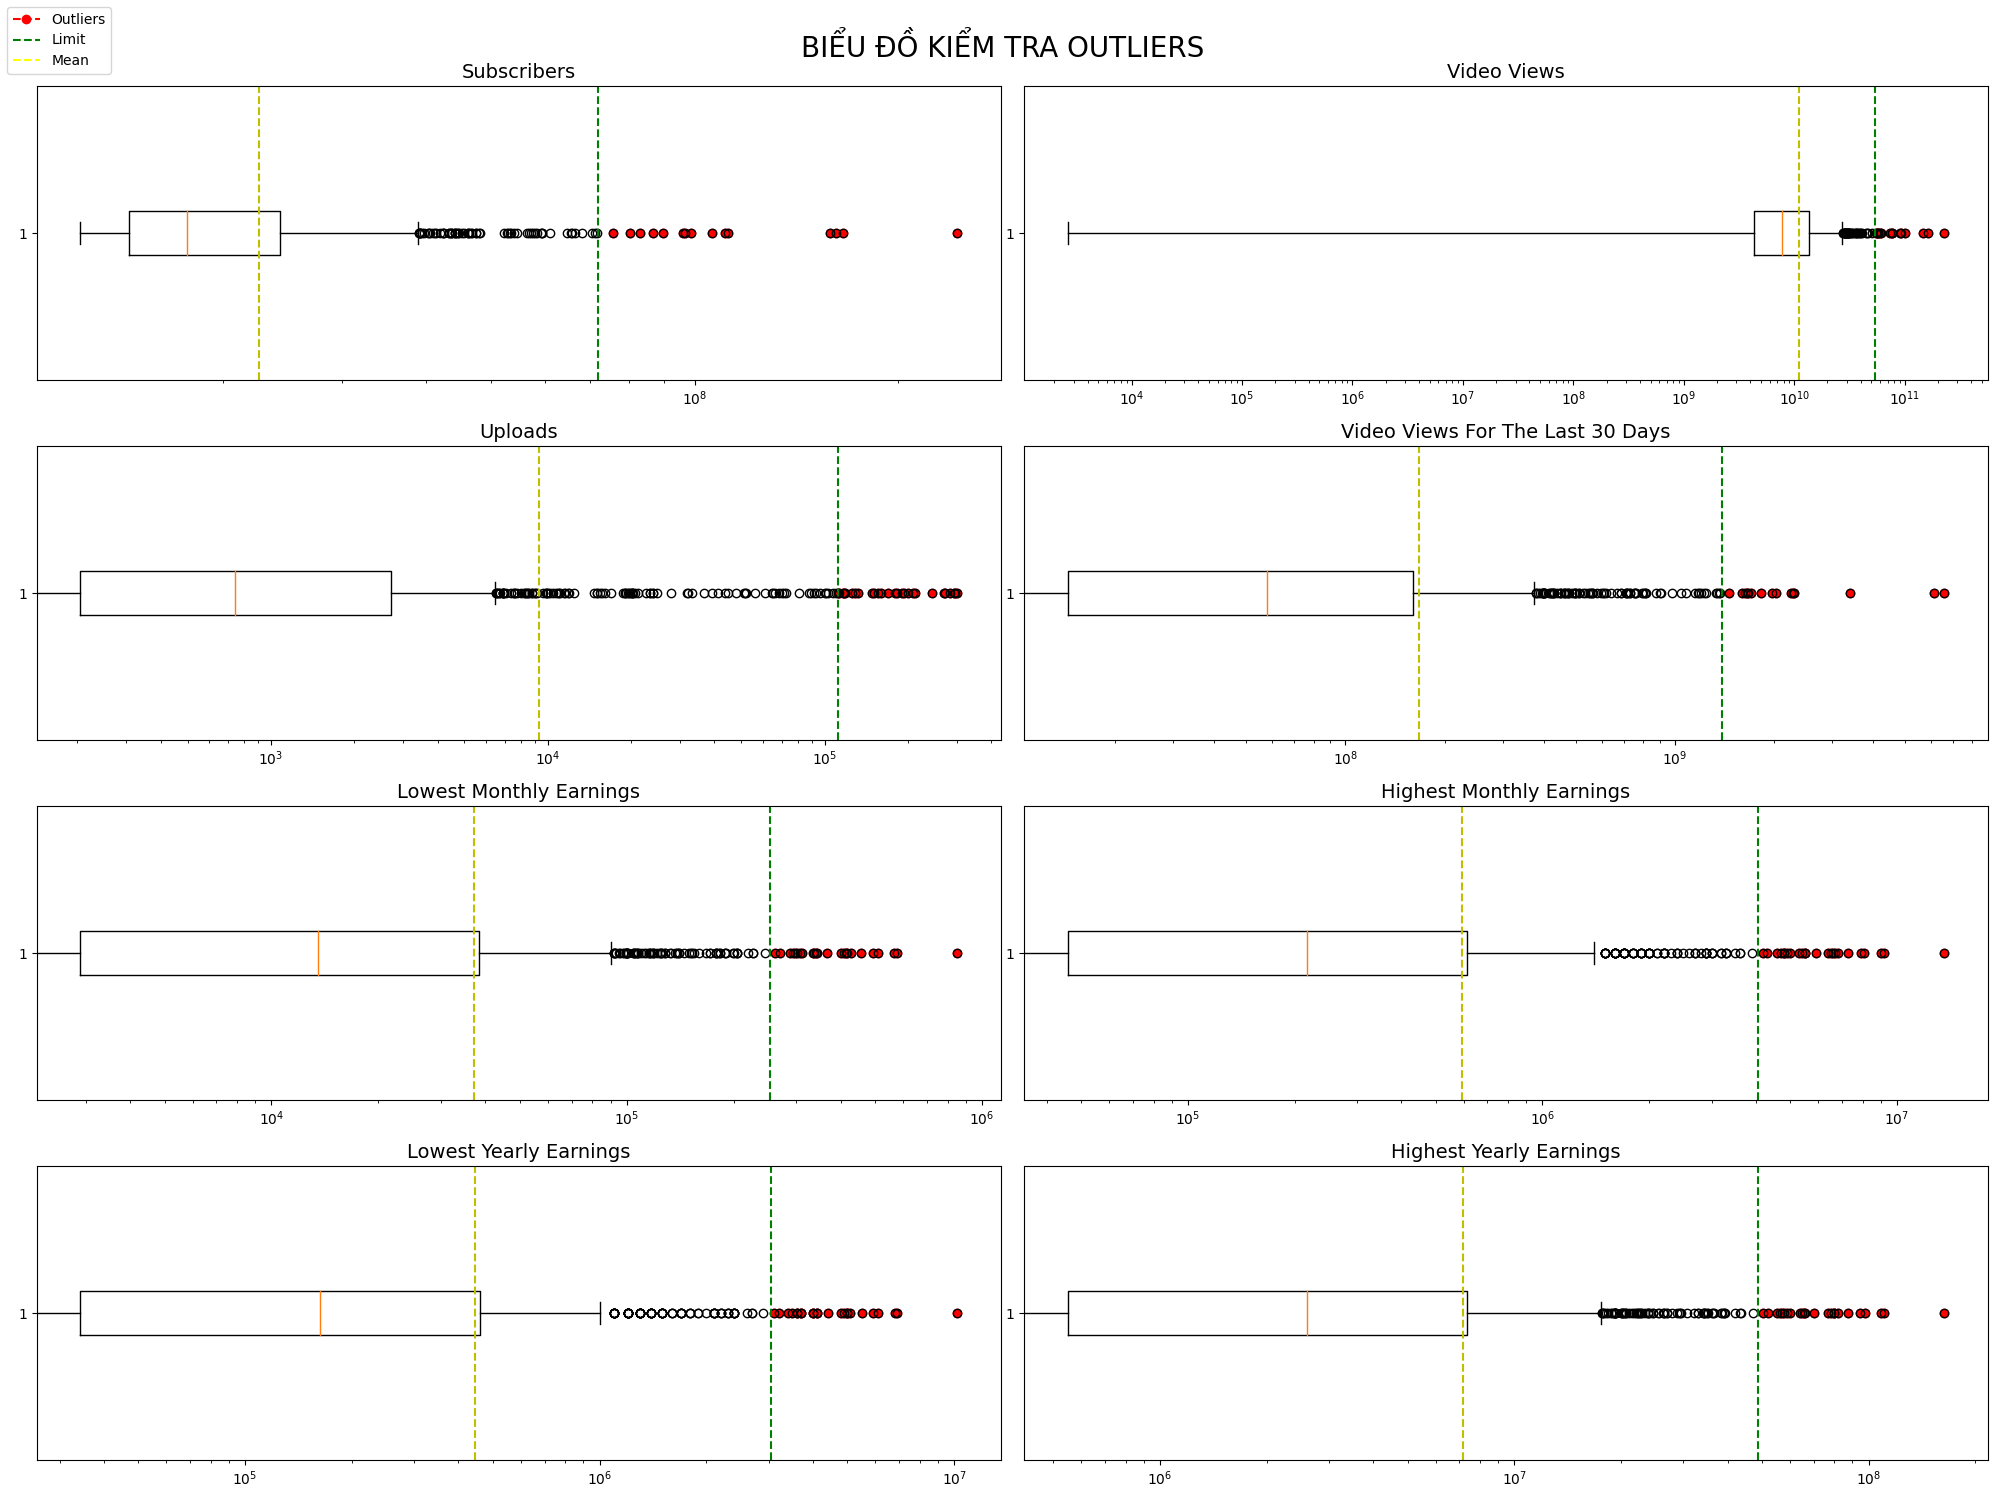

In [ ]:
#Vẽ outliers:
def draw_outliers(column):

    # outliers = dict(marker = 'D', markerfacecolor = 'r')
    plt.boxplot(column, vert = False)
    plt.xscale('log')
    # Check outlier và đánh dấu
    outliers, _ = check_outliers(column)
    if len(outliers) > 0:
      plt.scatter(outliers, [1] * len(outliers), c='r', marker='o', label='Outliers')
    mean = np.mean(column)
    std = np.std(column)
    upper_limit = mean + 3 * std
    lower_limit = mean - 3 * std

    # Vẽ đường với các màu cụ thể
    plt.axvline(mean, color='y', linestyle='--')
    plt.axvline(lower_limit, color='g', linestyle='--')
    plt.axvline(upper_limit, color='g', linestyle='--')


fig, axs = plt.subplots(4, 2, figsize=(20, 15))
fig.suptitle('BIỂU ĐỒ KIỂM TRA OUTLIERS', fontsize=20, weight = 2)

# selected_col = []
# for col in df.columns:
#     if col  in columns:
#         selected_col.append(col)

for i, col in enumerate(columns):
      plt.subplot(4,2,i+1)
      draw_outliers(df[col])
      plt.title(col, fontdict = {'fontsize': 14})

# Tạo chú thích
red_dot = mlines.Line2D([], [], color='red', marker='o', linestyle='--', label='Outliers')
green_line = mlines.Line2D([], [], color='green', linestyle='--', label='Limit')
yellow_line = mlines.Line2D([], [], color='yellow', linestyle='--', label='Mean')
fig.legend(handles=[red_dot, green_line, yellow_line], loc='upper left')

plt.tight_layout(w_pad =0.3)
plt.show()

Nhận xét: Mục đích của bài nghiên cứu là tìm ra các insights hữu ích từ các kênh Youtube nổi tiếng trên thế giới, có thể xem xét không loại bỏ outliers ở các cột trên, vì trong thực tế, vẫn tồn tại các trường hợp có các kênh Youtube với lượt xem, lượt đăng ký, thu nhập,... cao hơn hẳn các kênh còn lại.

* **Subscribers**: Mặc dù hầu hết các kênh đều có số người đăng ký ở phạm vi thấp hơn nhưng vẫn có một số kênh có số lượng người đăng ký đặc biệt cao, được coi là những kênh có tiềm năng vượt trội.
* **Video** **Views**: Tương tự, hầu hết các kênh đều có lượt xem video ở mức thấp nhưng một số kênh có lượt xem video cực cao.
* **Uploads**: Phần lớn các kênh có số lượng video tải lên vừa phải. Tuy nhiên, một số kênh có số lượt tải lên cực cao, có vẻ như là những kênh ngoại lệ.

## 2.Phân tích dữ liệu



### 2.1. Phân tích đơn biến

In [ ]:
def one_variable(col):
  plt.figure(figsize = (12, 8))

  ## Vẽ boxplot
  a1 = plt.subplot2grid((4,4),(0,0),colspan = 4)
  a2 = plt.subplot2grid((4,4),(1,0), rowspan = 2, colspan = 2)
  a3 = plt.subplot2grid((4,4),(1,2),rowspan = 2, colspan = 2)

  a1.set_title(f"Biểu đồ box plot của {col}")
  sns.boxplot(x= df[col], ax = a1)
  a1.ticklabel_format(style='plain', axis='x')


  ## Vẽ histogram
  a2.set_title(f"Biểu đồ phân phối của {col}")
  sns.histplot(df[col],bins=25, kde=True, edgecolor='black', ax =a2)
  a2.set_ylabel("Tần số")


  ## Vẽ QQplot
  stats.probplot(df[col], plot= a3)
  a3.set_title(f"Biểu đồ QQplot của {col}")
  a3.set_xlabel("Phân vị lý thuyết")
  a3.set_ylabel("Phân vị quan sát")


  plt.tight_layout()
  plt.show()


#### Biến Subscribers

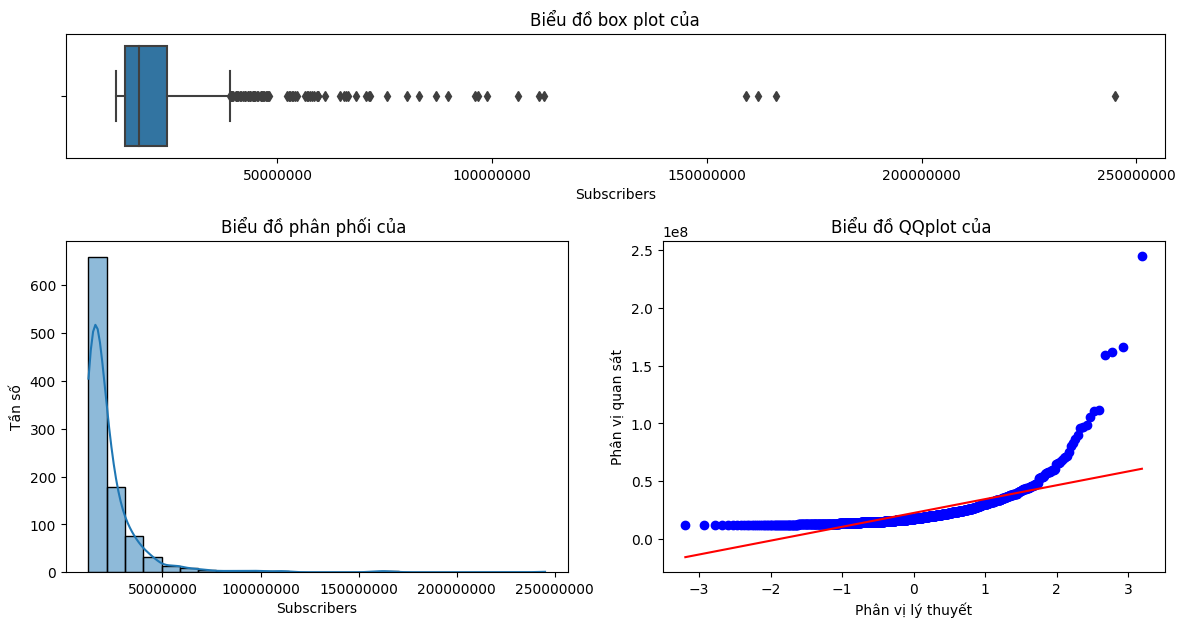

In [ ]:
plt.figure(figsize = (12, 8))

## Vẽ boxplot
a1 = plt.subplot2grid((4,4),(0,0),colspan = 4)
a2 = plt.subplot2grid((4,4),(1,0), rowspan = 2, colspan = 2)
a3 = plt.subplot2grid((4,4),(1,2),rowspan = 2, colspan = 2)

a1.set_title(f"Biểu đồ box plot của")
sns.boxplot(x= df['Subscribers'], ax = a1)
a1.ticklabel_format(style='plain', axis='x')

## Vẽ histogram
a2.set_title("Biểu đồ phân phối của ")
sns.histplot(df['Subscribers'],bins=25, kde=True, edgecolor='black', ax =a2)
a2.set_ylabel("Tần số")
a2.ticklabel_format(style='plain', axis='x')

## Vẽ QQplot
stats.probplot(df['Subscribers'], plot= a3)
a3.set_title("Biểu đồ QQplot của ")
a3.set_xlabel("Phân vị lý thuyết")
a3.set_ylabel("Phân vị quan sát")


plt.tight_layout()
plt.show()


In [ ]:
df['Subscribers'].describe()

count    9.860000e+02
mean     2.258722e+07
std      1.643924e+07
min      1.230000e+07
25%      1.450000e+07
50%      1.770000e+07
75%      2.427500e+07
max      2.450000e+08
Name: Subscribers, dtype: float64

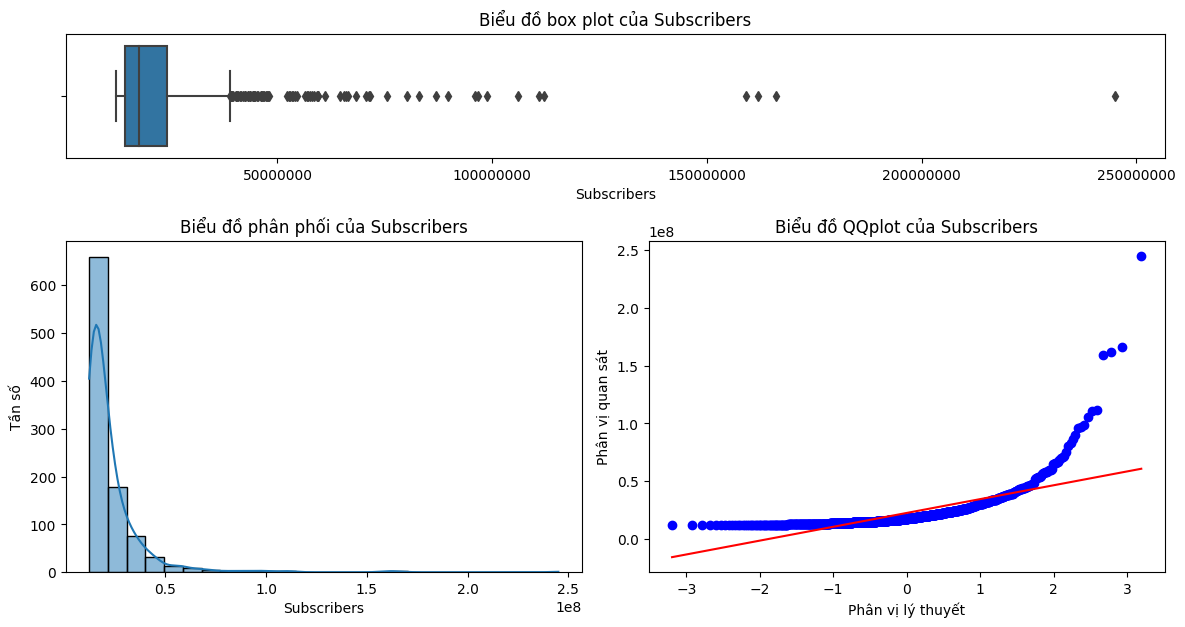

In [ ]:
one_variable('Subscribers')

#### Biến Video Views

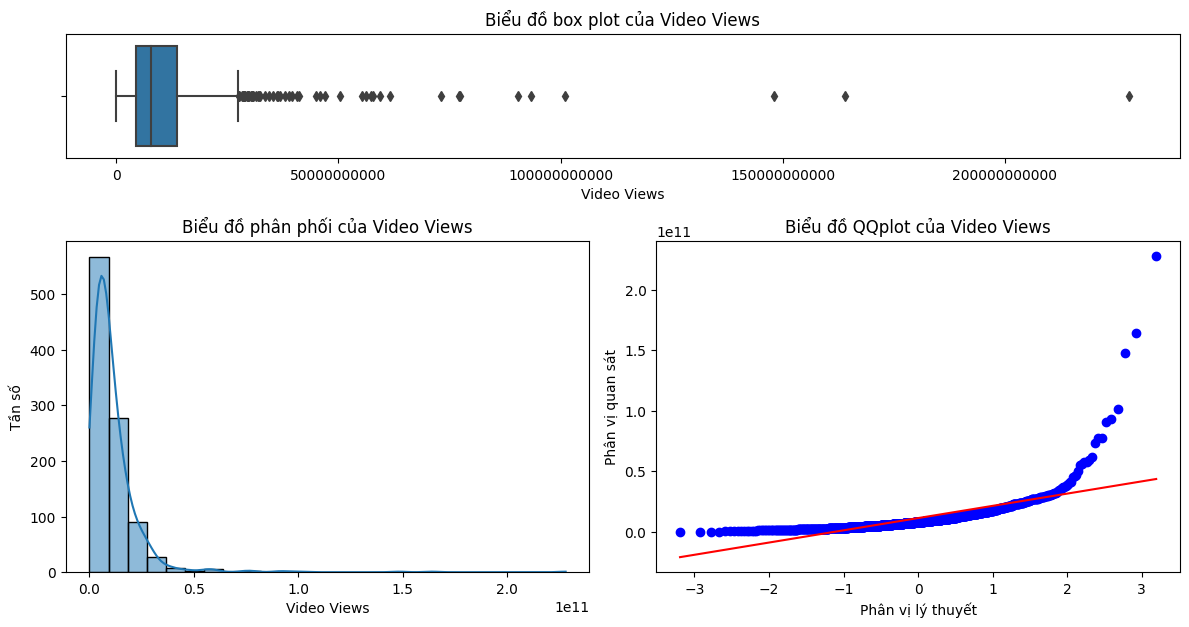

In [ ]:
one_variable('Video Views')

#### Biến Uploads

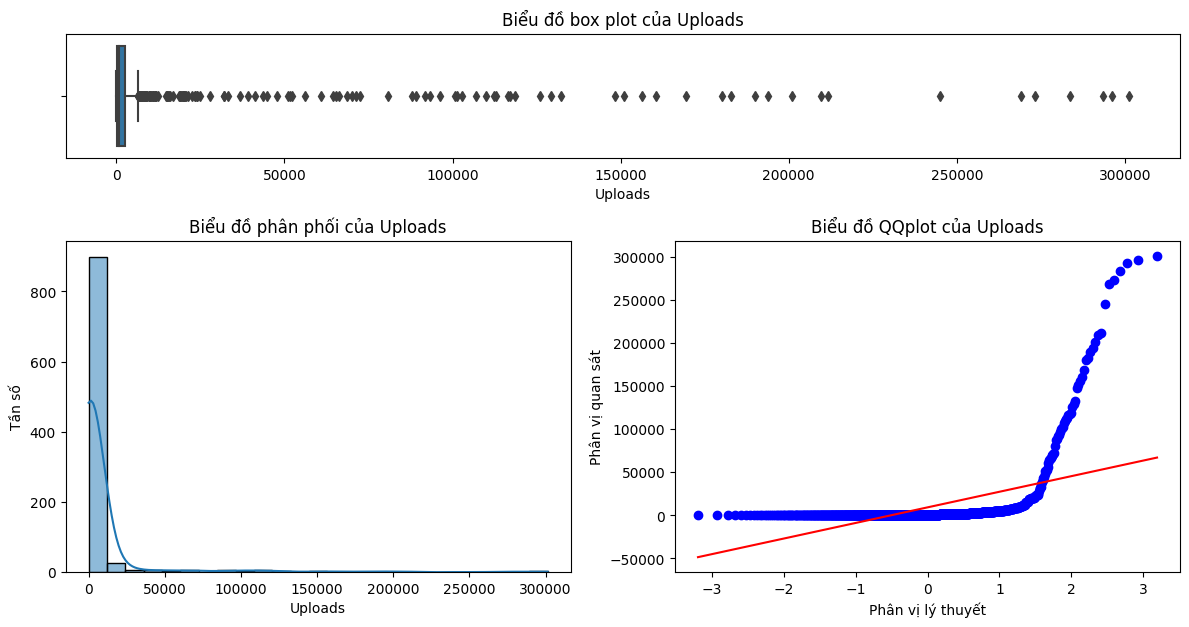

In [ ]:
one_variable('Uploads')

#### Biến Video Views For The Last 30 Days

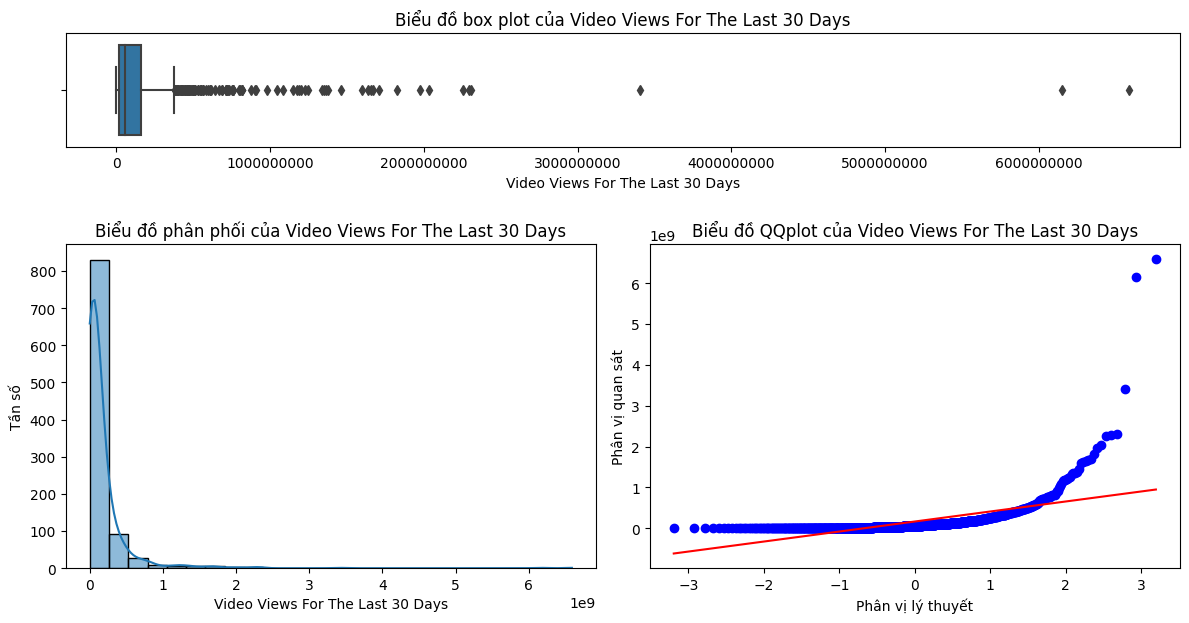

In [ ]:
one_variable('Video Views For The Last 30 Days')

#### Biến Lowest Monthly Earnings

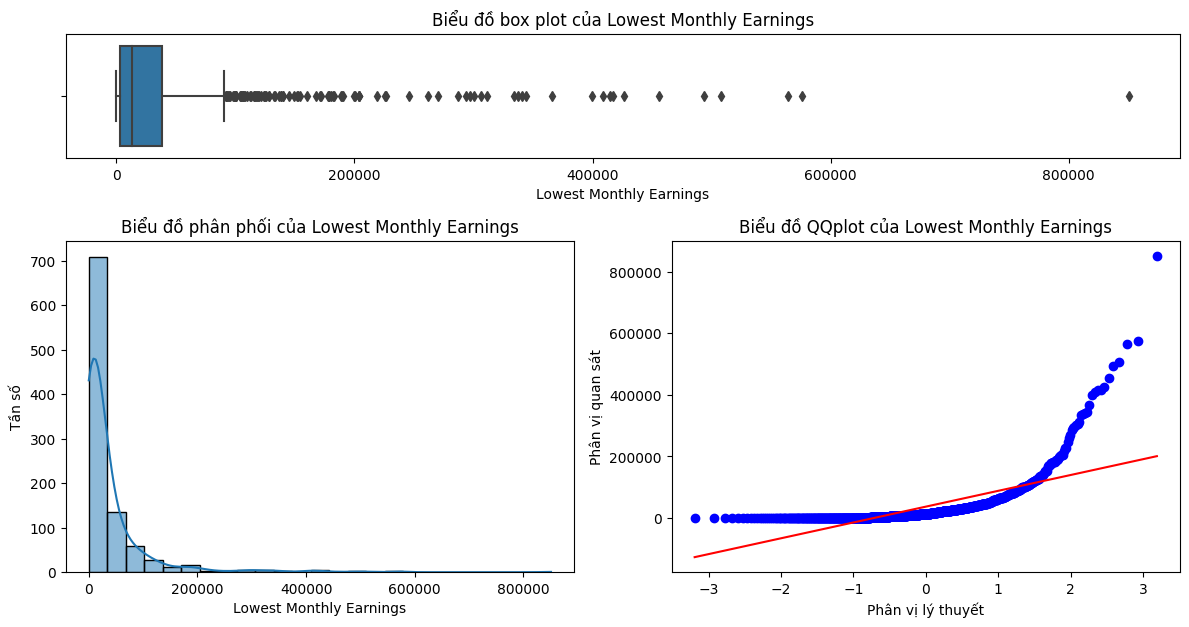

In [ ]:
one_variable('Lowest Monthly Earnings')

#### Biến Highest Monthly Earnings

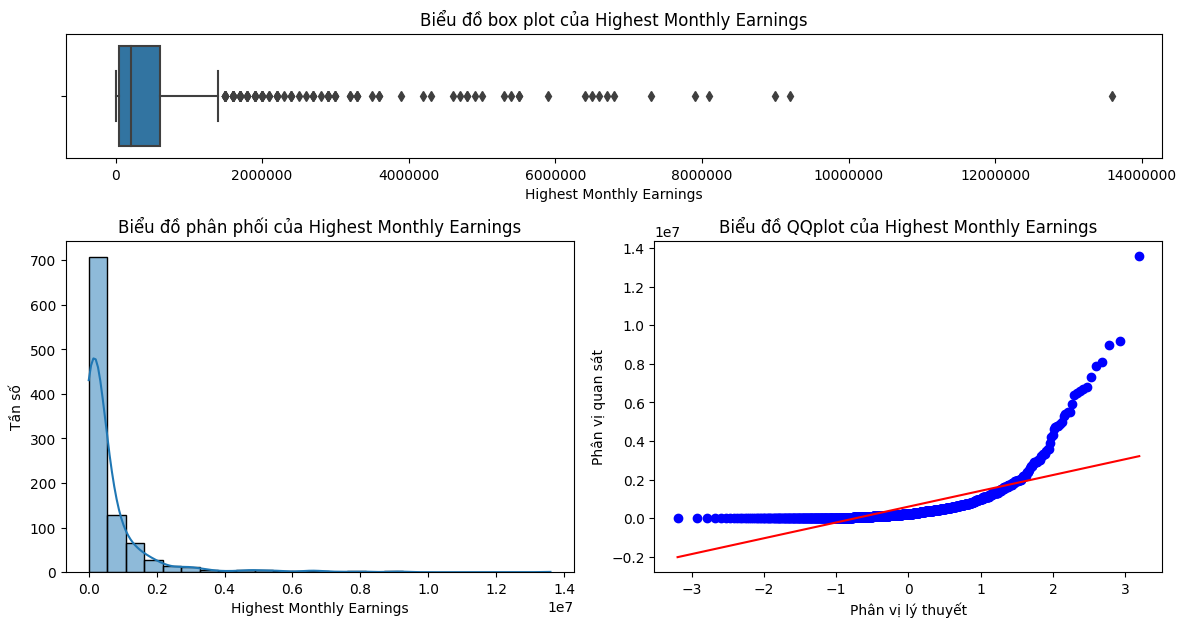

In [ ]:
one_variable('Highest Monthly Earnings')

#### Biến Lowest Yearly Earnings

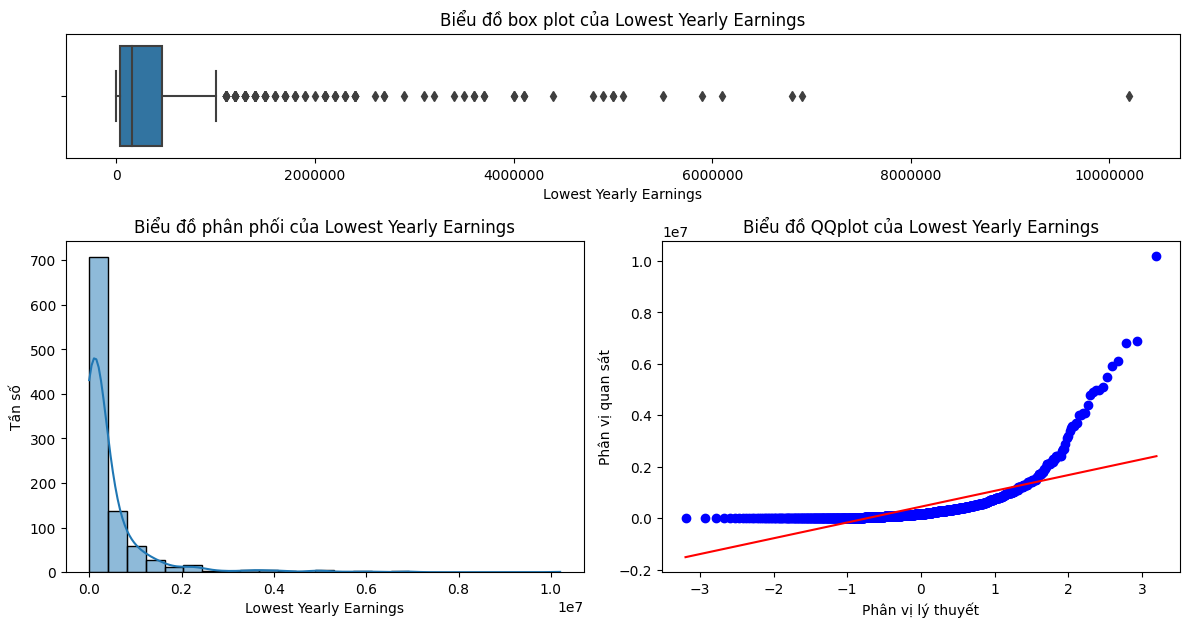

In [ ]:
one_variable('Lowest Yearly Earnings')

#### Biến Highest Yearly Earnings

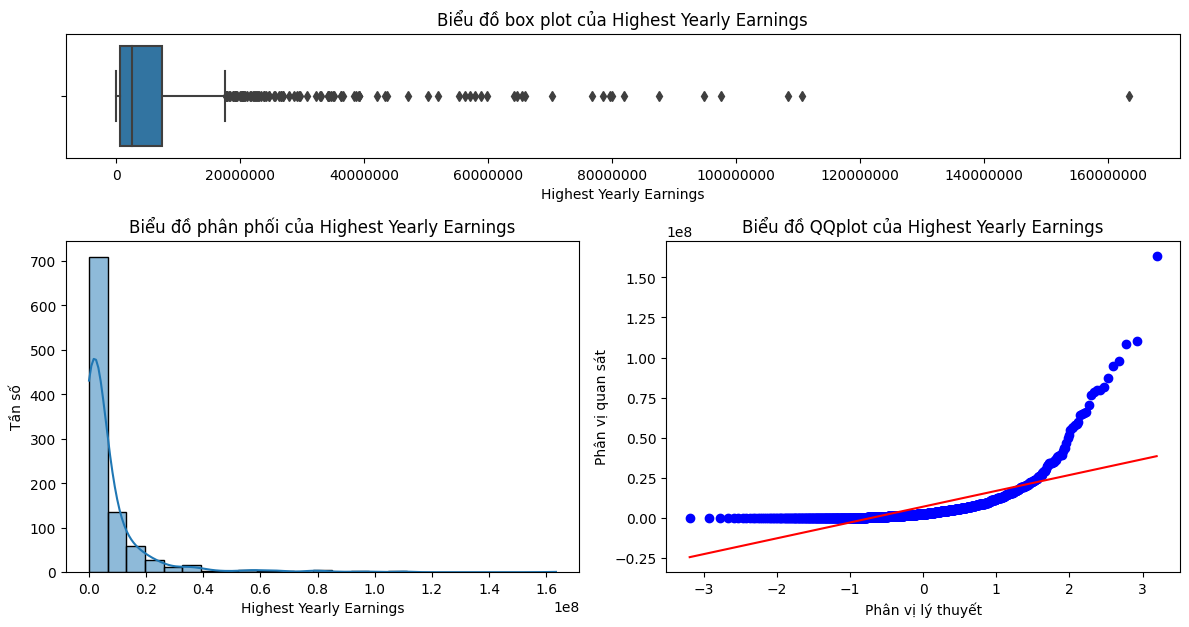

In [ ]:
one_variable('Highest Yearly Earnings')

## Phân tích dữ liệu

#### Phân tích tương quan

<ipython-input-90-cb8093ed0466>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


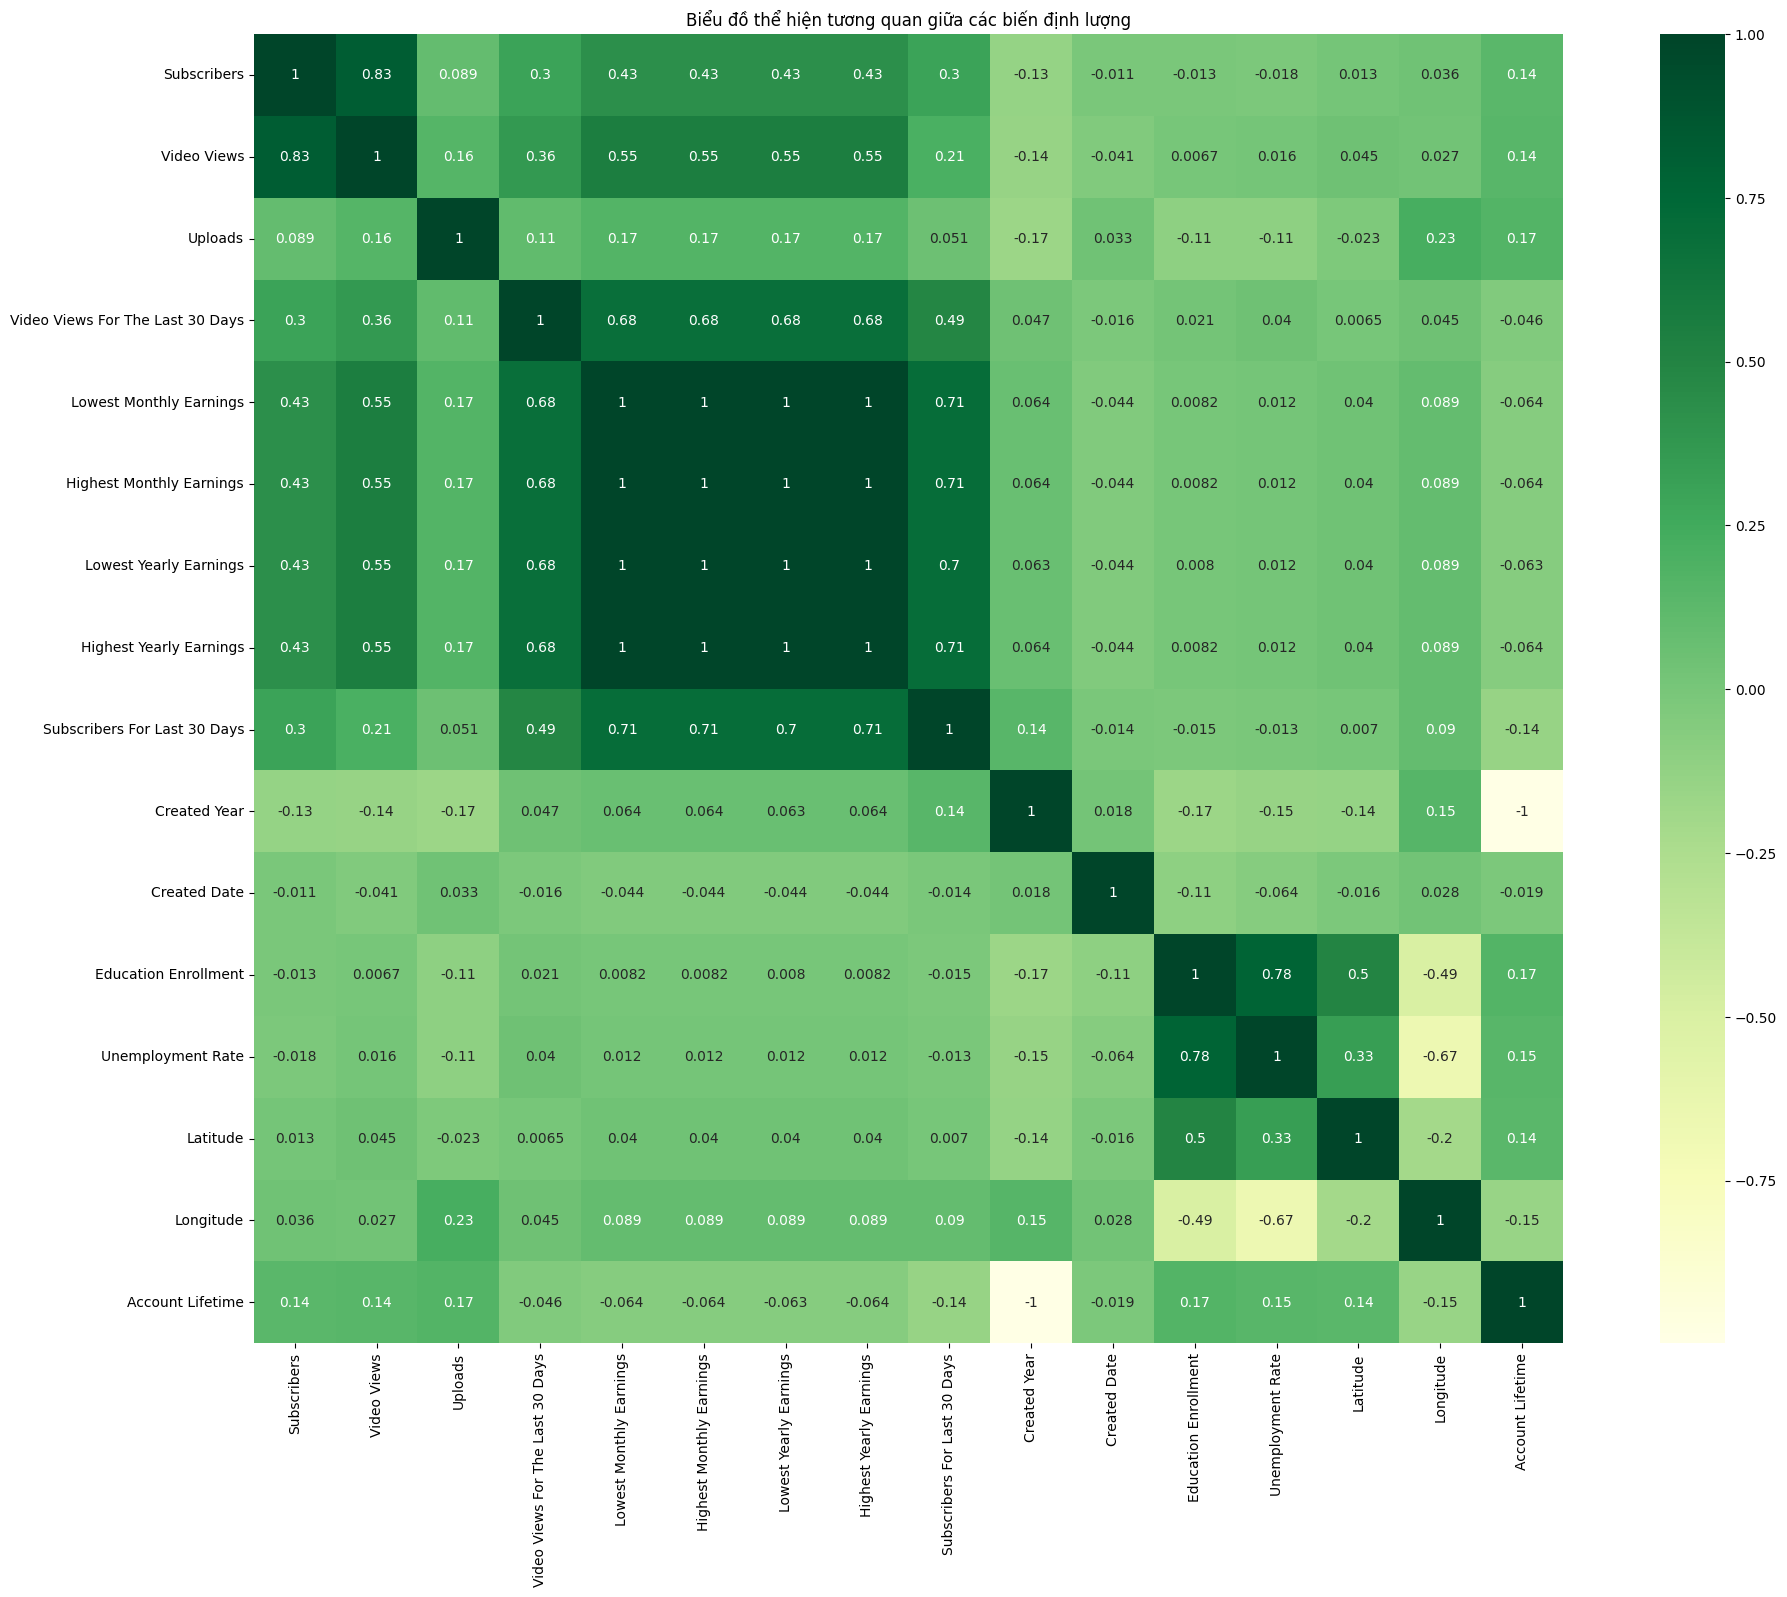

In [ ]:
# Tạo ma trận tương quan Pearson giữa các biến
correlation_matrix = df.corr()
#Chỉnh size
plt.figure(figsize=(25, 17))
# Định nghĩa bảng màu
cmap = sns.color_palette("YlGn", as_cmap=True)
# Vẽ heatmap
sns.heatmap(correlation_matrix, annot=True,cmap=cmap, square=True)
plt.title('Biểu đồ thể hiện tương quan giữa các biến định lượng')
plt.show()

In [ ]:
correlation_summary = {
    'Tương quan mạnh (+)': set(),
    'Tương quan mạnh (-)': set(),
}

for i, column in enumerate(correlation_matrix.columns):
    for j, row in enumerate(correlation_matrix.index):
        if i < j:  # Tránh việc xem xét cả bên trên và bên dưới đường chéo
            value = correlation_matrix.iloc[j, i]
            if value >= 0.7:
                correlation_summary['Tương quan mạnh (+)'].add((row, column))
            elif value < -0.7:
                correlation_summary['Tương quan mạnh (-)'].add((row, column))

# In kết luận
for key, value in correlation_summary.items():
    print(f'\n')
    for correlation in value:
        print(f"Có sự {key} giữa biến {correlation[0]} và {correlation[1]}")



Có sự Tương quan mạnh (+) giữa biến Highest Yearly Earnings và Lowest Monthly Earnings
Có sự Tương quan mạnh (+) giữa biến Subscribers For Last 30 Days và Lowest Monthly Earnings
Có sự Tương quan mạnh (+) giữa biến Subscribers For Last 30 Days và Highest Monthly Earnings
Có sự Tương quan mạnh (+) giữa biến Highest Yearly Earnings và Lowest Yearly Earnings
Có sự Tương quan mạnh (+) giữa biến Lowest Yearly Earnings và Lowest Monthly Earnings
Có sự Tương quan mạnh (+) giữa biến Lowest Yearly Earnings và Highest Monthly Earnings
Có sự Tương quan mạnh (+) giữa biến Unemployment Rate và Education Enrollment
Có sự Tương quan mạnh (+) giữa biến Highest Monthly Earnings và Lowest Monthly Earnings
Có sự Tương quan mạnh (+) giữa biến Subscribers For Last 30 Days và Lowest Yearly Earnings
Có sự Tương quan mạnh (+) giữa biến Subscribers For Last 30 Days và Highest Yearly Earnings
Có sự Tương quan mạnh (+) giữa biến Highest Yearly Earnings và Highest Monthly Earnings
Có sự Tương quan mạnh (+) giữa

In [ ]:
df_earnings = df
df_earnings['Mean Monthly Earnings'] = df_earnings[['Lowest Monthly Earnings', 'Highest Monthly Earnings']].mean(axis=1)
df_earnings['Mean Yearly Earnings'] = df_earnings[['Lowest Yearly Earnings', 'Highest Yearly Earnings']].mean(axis=1)
df_earnings

Youtuber  Subscribers   Video Views        Category  \
0                      T-Series    245000000  228000000000           Music   
1                       MrBeast    166000000   28368841870   Entertainment   
2    Cocomelon - Nursery Rhymes    162000000  164000000000       Education   
3                     SET India    159000000  148000000000           Shows   
4               Kids Diana Show    112000000   93247040539  People & Blogs   
..                          ...          ...           ...             ...   
981                 Natan por A     12300000    9029609749          Sports   
982    Free Fire India Official     12300000    1674409945  People & Blogs   
983                       Panda     12300000    2214684303         Unknown   
984                 RobTopGames     12300000     374123483          Gaming   
985                Make Joke Of     12300000    2129773714          Comedy   

                          Title   Uploads         Country Abbreviation  \
0                      T-Series   20082.0           India           IN   
1                       MrBeast     741.0   United States           US   
2    Cocomelon - Nursery Rhymes     966.0   United States           US   
3                     SET India  116536.0           India           IN   
4               Kids Diana Show    1111.0   United States           US   
..                          ...       ...             ...          ...   
981                 Natan por A    1200.0          Brazil           BR   
982    Free Fire India Official    1500.0           India           IN   
983                 HybridPanda    2452.0  United Kingdom           GB   
984                 RobTopGames      39.0          Sweden           SE   
985                Make Joke Of      62.0           India           IN   

      Channel Type  Video Views For The Last 30 Days  ...  Created Month  \
0            Music                        2258000000  ...            Mar   
1    Entertainment                        1348000000  ...            Feb   
2        Education                        1975000000  ...            Sep   
3    Entertainment                        1824000000  ...            Sep   
4    Entertainment                         731674000  ...            May   
..             ...                               ...  ...            ...   
981  Entertainment                         552513000  ...            Feb   
982          Games                          64735000  ...            Sep   
983          Games                             67035  ...            Sep   
984          Games                           3871000  ...            May   
985         Comedy                          24000000  ...            Aug   

     Created Date  Education Enrollment  Unemployment Rate   Latitude  \
0              13                  28.1               5.36  20.593684   
1              20                  88.2              14.70  37.090240   
2               1                  88.2              14.70  37.090240   
3              20                  28.1               5.36  20.593684   
4              12                  88.2              14.70  37.090240   
..            ...                   ...                ...        ...   
981            12                  51.3              12.08 -14.235004   
982            14                  28.1               5.36  20.593684   
983            11                  60.0               3.85  55.378051   
984             9                  67.0               6.48  60.128161   
985             1                  28.1               5.36  20.593684   

     Longitude Created Channel  Account Lifetime  Mean Monthly Earnings  \
0    78.962880      2006-03-13                17              4782300.0   
1   -95.712891      2012-02-20                11              2868500.0   
2   -95.712891      2006-09-01                17              4196900.0   
3    78.962880      2006-09-20                17              3877950.0   
4   -95.712891      2015-05-12  

<Figure size 1500x1000 with 0 Axes>

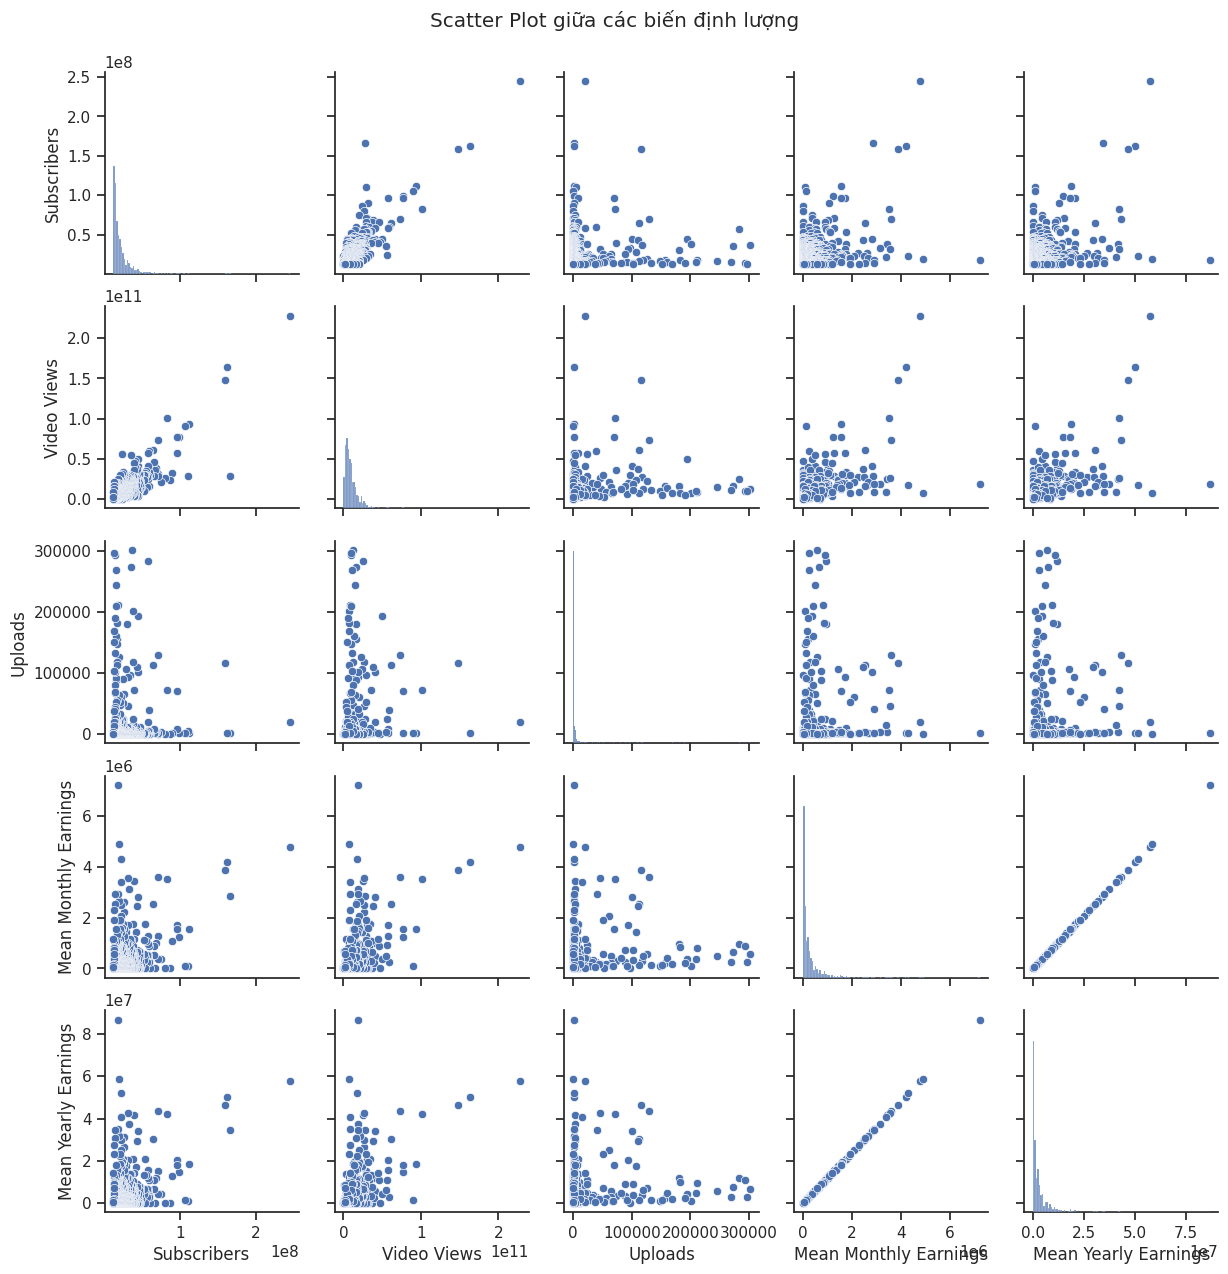

In [ ]:
sns.set(style="ticks")
columns = ['Subscribers','Video Views','Uploads',
           'Mean Monthly Earnings','Mean Yearly Earnings']
plt.figure(figsize=(15, 10))

sns.pairplot(df_earnings[columns])

# Đặt tiêu đề cho biểu đồ
plt.suptitle('Scatter Plot giữa các biến định lượng', y=1.02)

# Hiển thị biểu đồ
plt.show()

#### YouTube Analytics/ Content

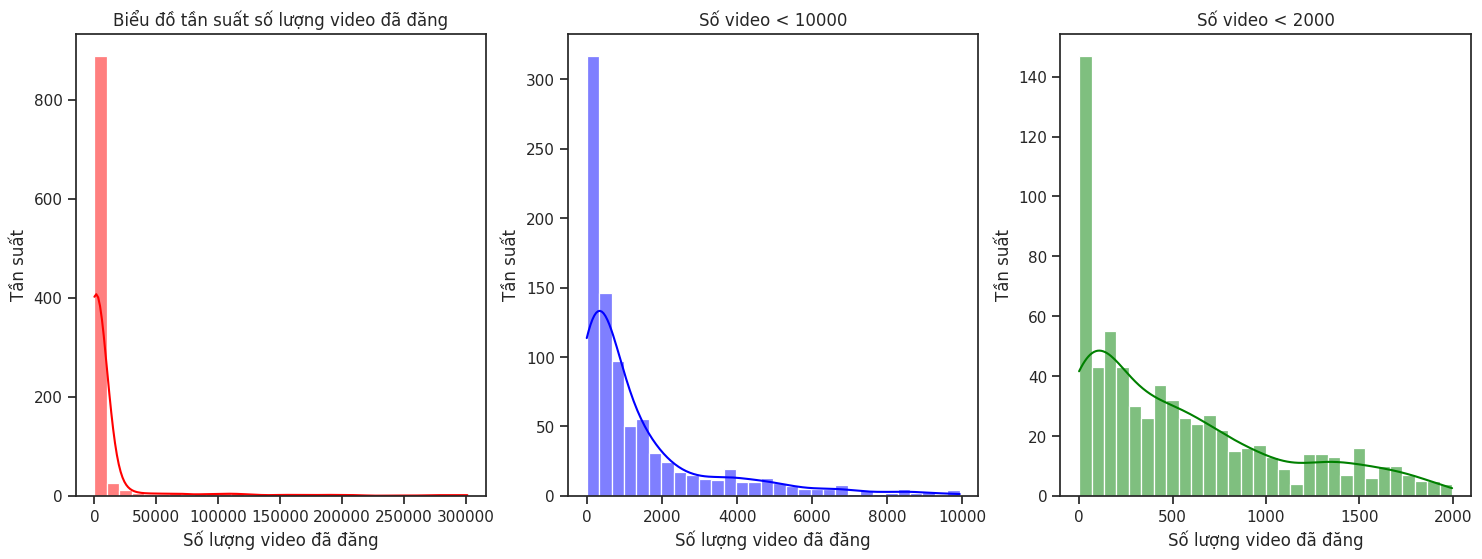

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Vẽ biểu đồ tần suất số lượng video đã đăng
sns.histplot(data=df, x='Uploads', bins=30, color='red', kde=True, ax=axes[0])
axes[0].set_title('Biểu đồ tần suất số lượng video đã đăng')
axes[0].set_xlabel('Số lượng video đã đăng')
axes[0].set_ylabel('Tần suất')

# Uploads < 10000
upload7000 = df[df['Uploads'] < 10000]
sns.histplot(data=upload7000, x='Uploads', bins=30, color='blue', kde=True, ax=axes[1])
axes[1].set_title('Số video < 10000')
axes[1].set_xlabel('Số lượng video đã đăng')
axes[1].set_ylabel('Tần suất')

# Uploads < 2000
upload1000 = df[df['Uploads'] < 2000]
sns.histplot(data=upload1000, x='Uploads', bins=30, color='green', kde=True, ax=axes[2])
axes[2].set_title('Số video < 2000')
axes[2].set_xlabel('Số lượng video đã đăng')
axes[2].set_ylabel('Tần suất')

plt.show()

In [ ]:
## Top 10 channel
selected_columns = ['Youtuber', 'Subscribers']

channels = df[selected_columns]
top_10_channels_desc = channels.sort_values(by = 'Subscribers', ascending = False).head(10)

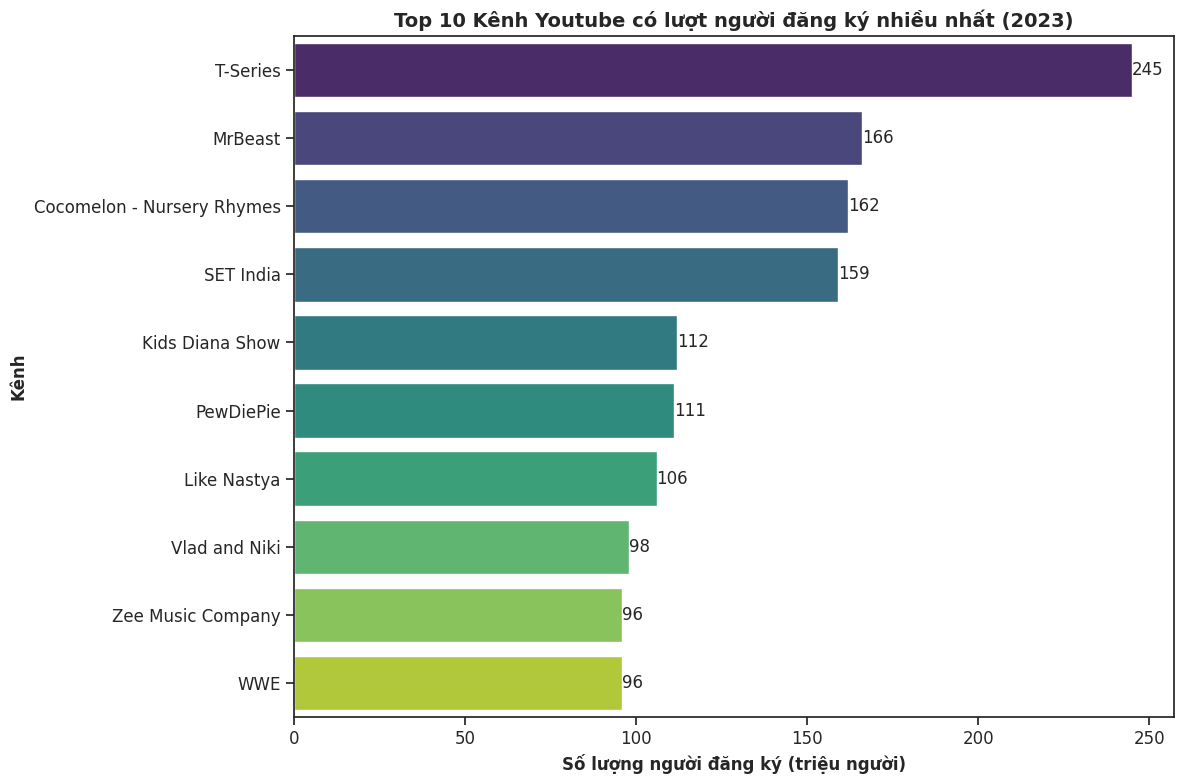

In [ ]:
## Biểu diễn Top 10 Channel
top_10_channels_desc['Subscribers (mn.)'] = (top_10_channels_desc['Subscribers'] / 1000000).astype(int)

plt.subplots(figsize=(12, 8))
sns.barplot(x = top_10_channels_desc['Subscribers (mn.)'], y = top_10_channels_desc['Youtuber']
                  , palette=sns.color_palette("viridis", 10), orient = 'h')

for index, value in enumerate(top_10_channels_desc['Subscribers (mn.)'].values):
    plt.text(value, index, str(value), ha='left', va='center')

## Hiển thị
plt.title('Top 10 Kênh Youtube có lượt người đăng ký nhiều nhất (2023)',fontsize = 14, weight = 'bold')
plt.xlabel('Số lượng người đăng ký (triệu người)', fontsize = 12,  weight = 'bold')
plt.ylabel('Kênh', fontsize = 12, weight = 'bold')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)


plt.tight_layout()
plt.show()

In [ ]:
## Top 10 thể loại và số lượng người đăng ký mỗi thể loại
# top10_channel_type = df['Channel Type'].value_counts().head(10)

# plt.figure(figsize = (10, 8))
# sns.set(style = "white")
# sns.barplot(x=top10_channel_type.values, y=top10_channel_type.index, palette=sns.color_palette("viridis", 10))

# for index, value in enumerate(top10_channel_type.values):
#     plt.text(value, index, str(value), ha='left', va='center')

# plt.title('Top 10 thể loại kênh phổ biến nhất')
# plt.xlabel('Số lượng kênh')
# plt.ylabel('Thể loại')
# plt.show()

In [ ]:
## Tạo một bảng tính tổng của từng thể loại
selected_columns = ['Category', 'Subscribers','Video Views']
content_df = df[selected_columns]
content_df['Subscribers (mn.)'] = (content_df['Subscribers'] / 1000000).astype(int)
content_df['Video View (bn.)'] = (content_df['Video Views'] / 1000000000).astype(int)

category_sum = content_df.groupby('Category').agg({
    'Subscribers (mn.)': 'sum',
    'Video View (bn.)': 'sum'
}).reset_index()

print(category_sum)

                 Category  Subscribers (mn.)  Video View (bn.)
0        Autos & Vehicles                 35                14
1                  Comedy               1361               518
2               Education               1173               672
3           Entertainment               5058              2409
4        Film & Animation               1126               521
5                  Gaming               1924               673
6           Howto & Style                757               178
7                  Movies                 50                15
8                   Music               5106              3020
9         News & Politics                489               257
10  Nonprofits & Activism                 54                10
11         People & Blogs               2719              1198
12         Pets & Animals                 70                42
13   Science & Technology                309                59
14                  Shows                535           

<ipython-input-99-98d52c29e26d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content_df['Subscribers (mn.)'] = (content_df['Subscribers'] / 1000000).astype(int)
<ipython-input-99-98d52c29e26d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content_df['Video View (bn.)'] = (content_df['Video Views'] / 1000000000).astype(int)


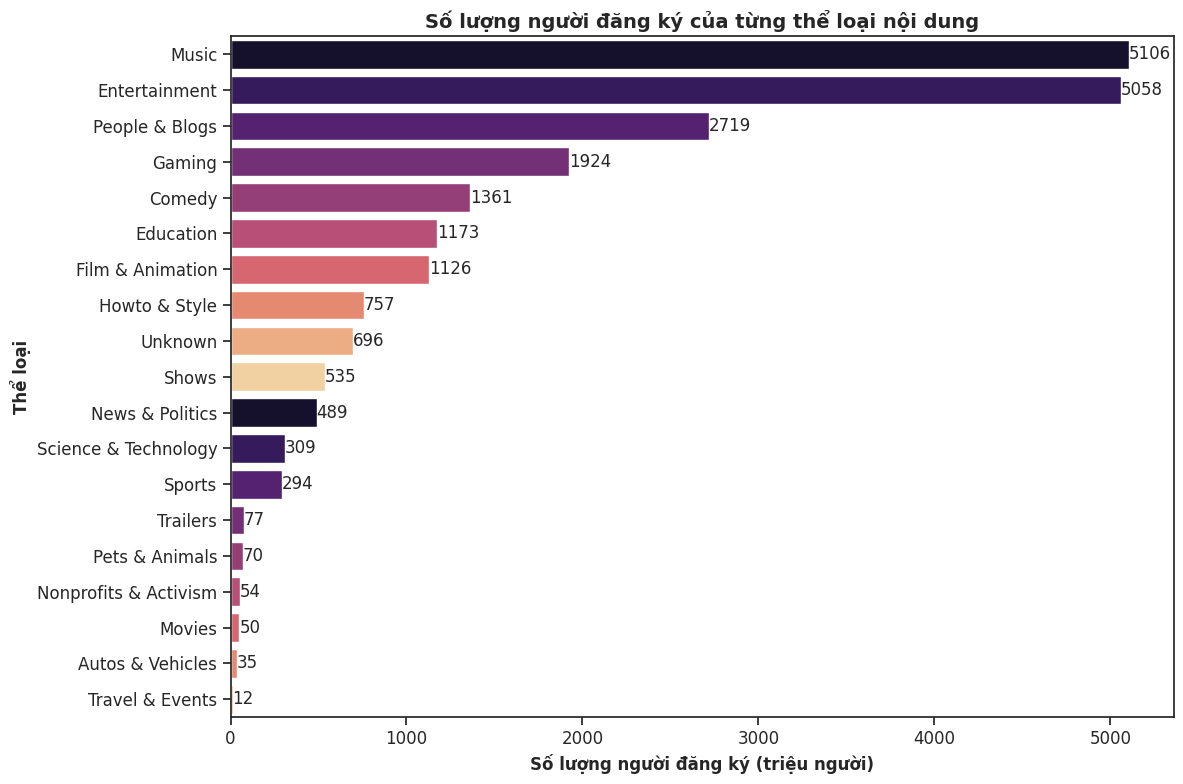

In [ ]:
## Biểu diễn số lượng người đăng ký của từng thể loại nội dùng
category_sum_subs = category_sum.sort_values(by = 'Subscribers (mn.)', ascending = False)

plt.figure(figsize = (12, 8))
sns.barplot(x = category_sum_subs['Subscribers (mn.)'], y = category_sum_subs['Category']
                  , palette=sns.color_palette("magma", 10), orient = 'h')

for index, value in enumerate(category_sum_subs['Subscribers (mn.)'].values):
    plt.text(value, index, str(value), ha='left', va='center')

## Format lại biểu đồ
plt.title('Số lượng người đăng ký của từng thể loại nội dung', fontsize = 14, weight = 'bold')
plt.xlabel('Số lượng người đăng ký (triệu người)', fontsize = 12,  weight = 'bold')
plt.ylabel('Thể loại', fontsize = 12, weight = 'bold')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.tight_layout()
plt.show()

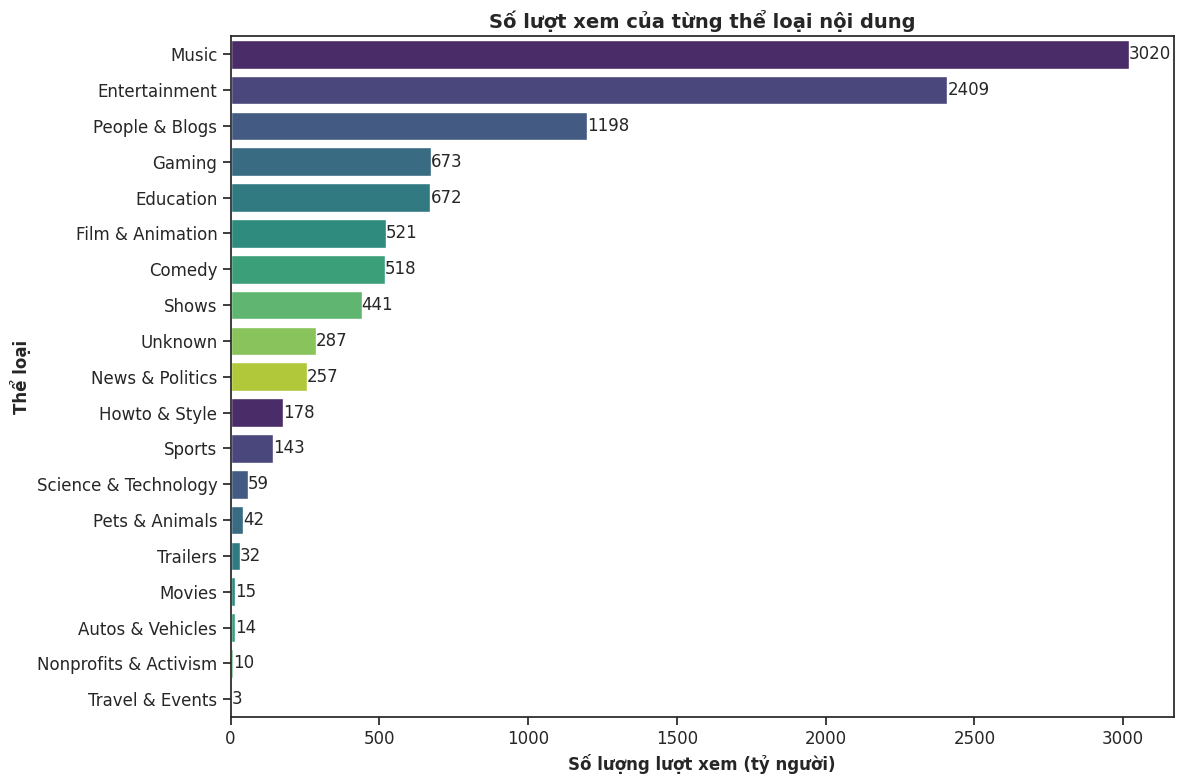

In [ ]:
## Biểu diễn lượt xem của từng thể loại nội dùng
category_sum_view = category_sum.sort_values(by = 'Video View (bn.)', ascending = False)

plt.figure(figsize = (12, 8))
sns.barplot(x = category_sum_view['Video View (bn.)'], y = category_sum_view['Category']
                  , palette=sns.color_palette("viridis", 10), orient = 'h')

for index, value in enumerate(category_sum_view['Video View (bn.)'].values):
    plt.text(value, index, str(value), ha='left', va='center')

## Format lại biểu đồ
plt.title('Số lượt xem của từng thể loại nội dung', fontsize = 14, weight = 'bold')
plt.xlabel('Số lượng lượt xem (tỷ người)', fontsize = 12,  weight = 'bold')
plt.ylabel('Thể loại', fontsize = 12, weight = 'bold')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.tight_layout()
plt.show()

1. Trong biểu đồ 'Top 10 Kênh Youtube có lượt người đăng ký nhiều nhất (2023)', nhiều nhiều thể loại kênh YouTube khác nhau đều chứng tỏ số lượng người đăng ký và lượt xem video cao. Trong khi 'Entertainment' nổi lên là danh mục chiếm ưu thế, thì thể loại 'Music' mới khẳng định tổng số người đăng ký và lượt xem video vượt trội. Cả hai thể loại 'Âm nhạc' và 'Giải trí' đều vượt qua các thể loại khác với tỷ lệ đáng kể, thu hút gần gấp đôi số người đăng ký và lượt xem video của thể loại xếp thứ ba, 'People & Blog'.

2. Đối với những người muốn ra mắt kênh YouTube với mong muốn thu hút được lượng khán giả trung thành và số lượt xem đáng kể, điều quan trọng là phải nhận ra thể loại nào thu hút nhiều người đăng ký và lượt xem video nhất. Việc điều hướng một thể loại đã bão hòa có thể đặt ra thách thức trong việc trở nên nổi bật, tuy nhiên tiềm năng thu hút khán giả là rất đáng kể. Mặt khác, mặc dù các thể loại ít phổ biến hơn có thể tạo cơ hội để phát triển nội dung nhưng chúng có thể giới hạn mức độ quan tâm và quy mô khán giả có thể có.

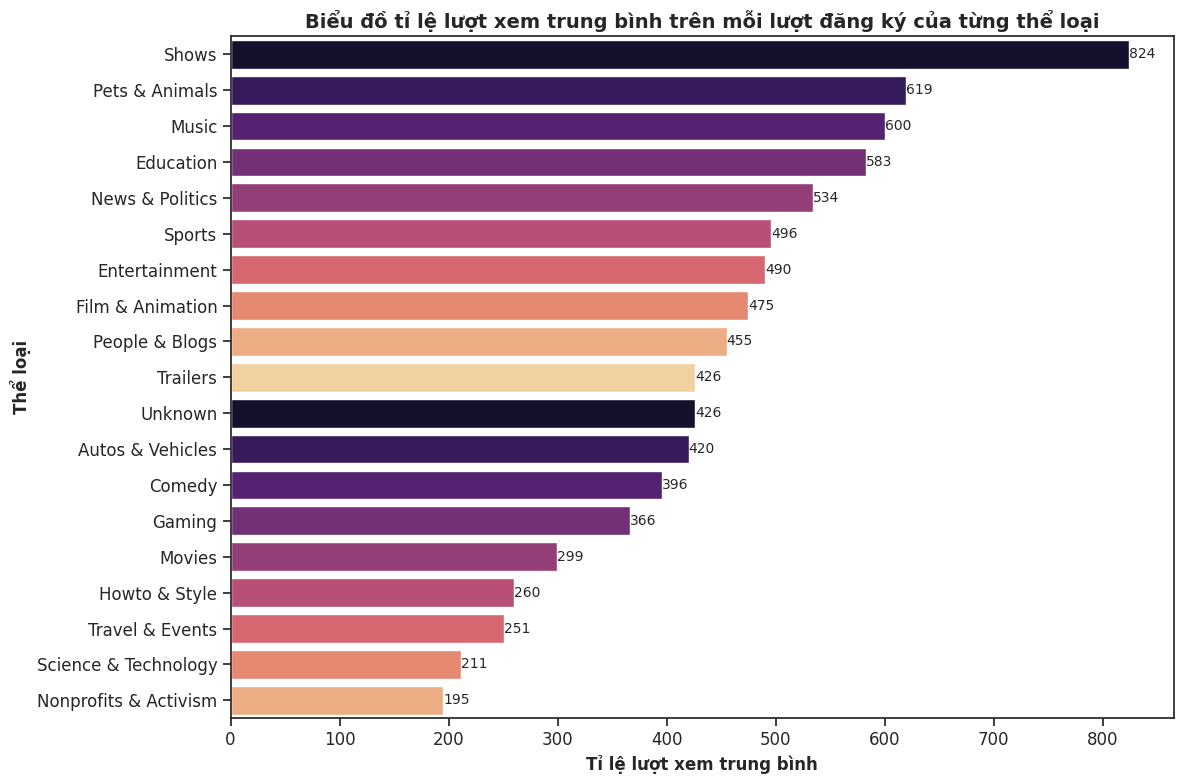

In [ ]:
## Thể loại nào có lượng khán giả tương tác nhiều nhất, được đo bằng lượt xem trên mỗi người đăng ký?
category_sum_raw = content_df.groupby('Category').agg({
    'Subscribers': 'sum',
    'Video Views': 'sum'
}).reset_index()

## Tạo một cột mới là View-to-Subscriber Ratio
category_sum_raw['View-to-Subscriber Ratio'] = category_sum_raw['Video Views'] / category_sum_raw['Subscribers']
category_sum_raw['View-to-Subscriber Ratio'] = category_sum_raw['View-to-Subscriber Ratio'].astype(int)

## Lọc dữ liệu từ dưới lên
category_sum_raw = category_sum_raw.sort_values(by = 'View-to-Subscriber Ratio', ascending = False)

## Biểu diễn bằng bar char
plt.figure(figsize = (12, 8))
sns.barplot(y = category_sum_raw['Category'], x = category_sum_raw['View-to-Subscriber Ratio']
                  , palette=sns.color_palette("magma", 10), orient = 'h')

for index, value in enumerate(category_sum_raw['View-to-Subscriber Ratio'].values):
    plt.text(value, index, str(value), ha='left', va='center', fontsize = 10)


## Format biểu đồ
plt.title('Biểu đồ tỉ lệ lượt xem trung bình trên mỗi lượt đăng ký của từng thể loại', fontsize = 14, weight = 'bold')
plt.xlabel('Tỉ lệ lượt xem trung bình', fontsize = 12,  weight = 'bold')
plt.ylabel('Thể loại', fontsize = 12, weight = 'bold')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.tight_layout()

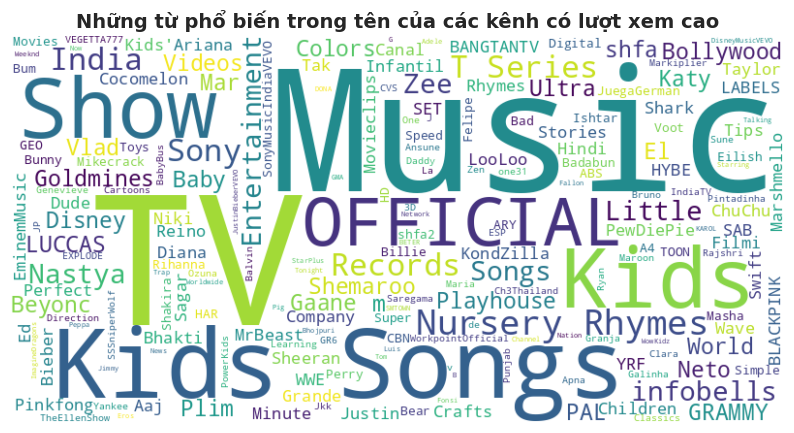

In [ ]:
## Những từ phổ biến nhất trong tên kênh có lượt xem cao là gì?

from wordcloud import WordCloud

percentile_75th = df['Video Views'].quantile(0.75)

## Lọc dữ liệu có video views cao hơn quantile 0.75
high_view_channels = df[df['Video Views'] > percentile_75th]

# Combine the names of high-view channels into a single string
text = ' '.join(high_view_channels['Youtuber'])

# Create the word cloud
plt.figure(figsize = (10, 8))
wordcloud = WordCloud(background_color = 'white', width = 800, height = 400).generate(text)

# Plot the word cloud
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Những từ phổ biến trong tên của các kênh có lượt xem cao', fontsize = 14, weight = 'bold')
plt.show()

#### Geospatial Visualization  & Regional Influencers       

In [ ]:
data = df[df['Country'] != 'Unknown']
country_group = data.groupby('Country')['Youtuber'].nunique().reset_index()
country_group.rename(columns={'Youtuber': 'Số lượng Youtuber'}, inplace=True)


In [ ]:
fig = px.choropleth(data_frame = country_group,
                    locations = 'Country',
                    locationmode= 'country names',
                    color='Số lượng Youtuber',  # Màu sắc dựa trên giá trị này
                    hover_name='Country',  # Hiển thị tên quốc gia khi di chuột qua
                    color_continuous_scale='plasma',  # Sắc độ màu
                    title='Số lượng Youtuber của từng quốc gia',
                    range_color = [1,60]
                    )
fig.show()

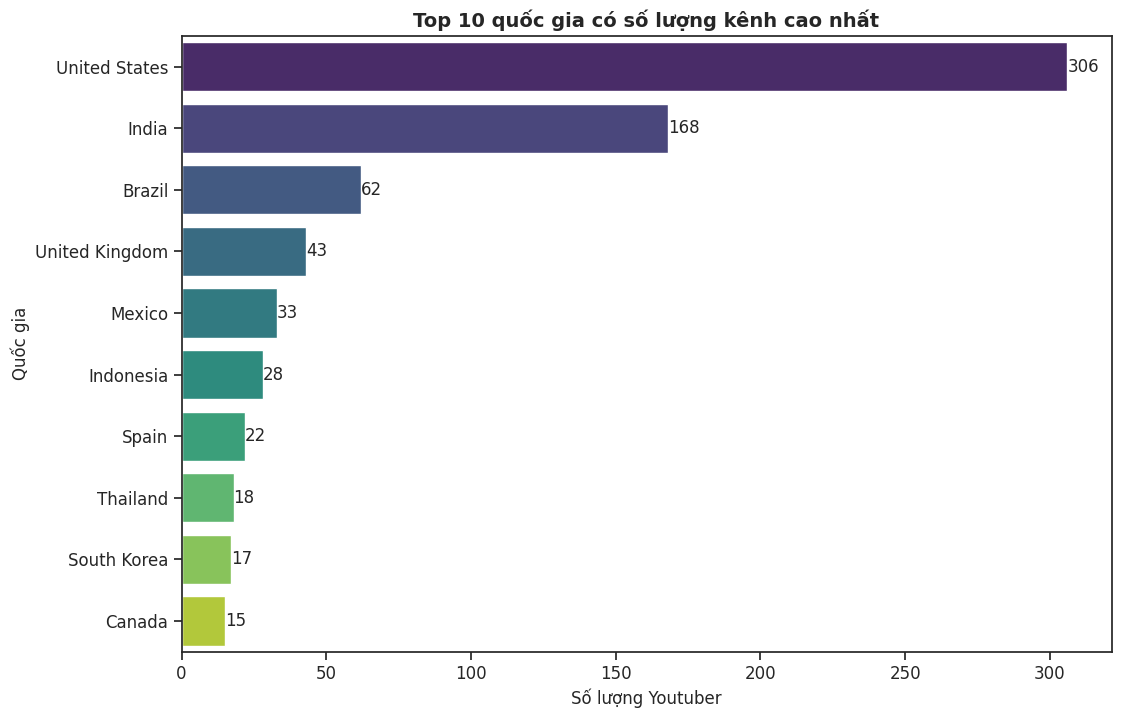

In [ ]:
## Quốc gia nào có số lượng youtuber cao nhất?
top10_country = country_group.sort_values(by = 'Số lượng Youtuber',ascending = False).head(10).reset_index(drop = True)

plt.figure(figsize = (12, 8))
sns.barplot(data = top10_country, x ='Số lượng Youtuber', y = 'Country', color = 'blue'
            , palette=sns.color_palette("viridis", 10))

for index, value in enumerate(top10_country['Số lượng Youtuber'].values):
    plt.text(value, index, str(value), ha='left', va='center')

plt.title('Top 10 quốc gia có số lượng kênh cao nhất',fontsize = 14, weight = 'bold')
plt.ylabel('Quốc gia', fontsize = 12)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

Ta nhận thấy giữa quốc gia có nhiều kênh youtube nhất là Mỹ có số lượng kênh nhiều xấp xỉ khoảng 3 lần so với quốc gia đứng thứ 2 là Ấn Độ. Ta chọn ra 4 quốc gia đứng đầu để tiếp tục phân tích

In [ ]:
country_list = ['United States', 'India','Brazil','United Kingdom']
category_list = ['Music', 'Entertainment','People & Blogs']

content_country = df[(df['Country'].isin(country_list)) & (df['Category'].isin(category_list))][['Country','Category','Youtuber']]
group_content = content_country.groupby(['Country','Category']).nunique().reset_index()
# group_content.rename(columns={'0': 'Số lượng kênh'}, inplace=True)
group_content

Country        Category  Youtuber
0           Brazil   Entertainment        14
1           Brazil           Music        16
2           Brazil  People & Blogs         6
3            India   Entertainment        45
4            India           Music        29
5            India  People & Blogs        15
6   United Kingdom   Entertainment        10
7   United Kingdom           Music        14
8   United Kingdom  People & Blogs         2
9    United States   Entertainment        68
10   United States           Music        72
11   United States  People & Blogs        38

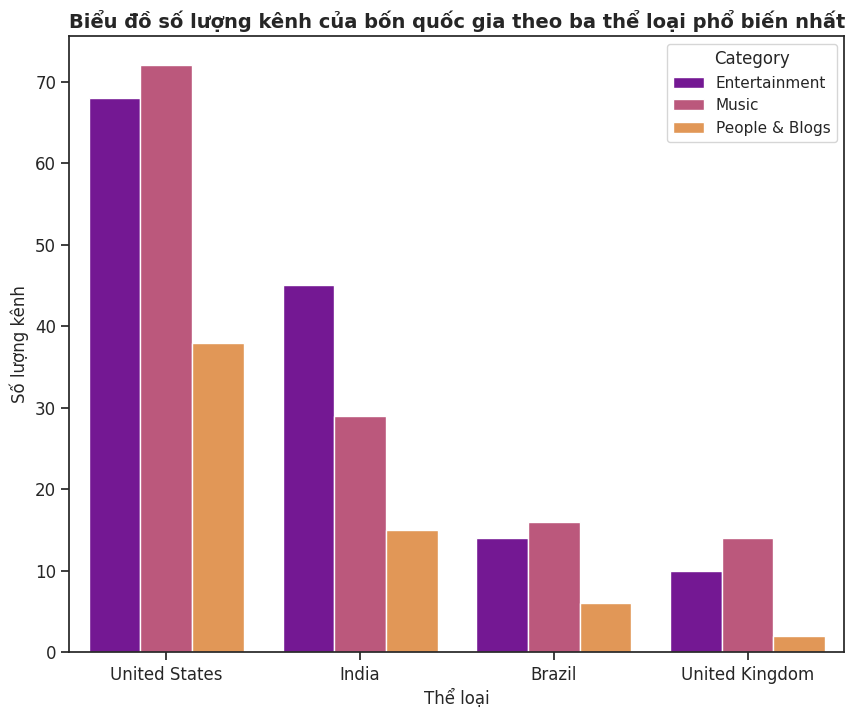

In [ ]:
plt.subplots(figsize=(10, 8))
sns.barplot(data=group_content, x= 'Country', y= 'Youtuber', hue= 'Category'
            , palette='plasma', order =['United States', 'India','Brazil','United Kingdom'])

## Format biểu đồ
plt.title('Biểu đồ số lượng kênh của bốn quốc gia theo ba thể loại phổ biến nhất',fontsize = 14, weight = 'bold')
plt.ylabel('Số lượng kênh', fontsize = 12)
plt.xlabel('Thể loại')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

* The United States has a diverse set of categories with high counts in "Entertainment", "Music", and "People & Blogs".
* India has a significant number of channels in the "Entertainment" category.
* Brazil also shows a strong presence in the "Music" and "Entertainment" categories.
* United Kingdom ....

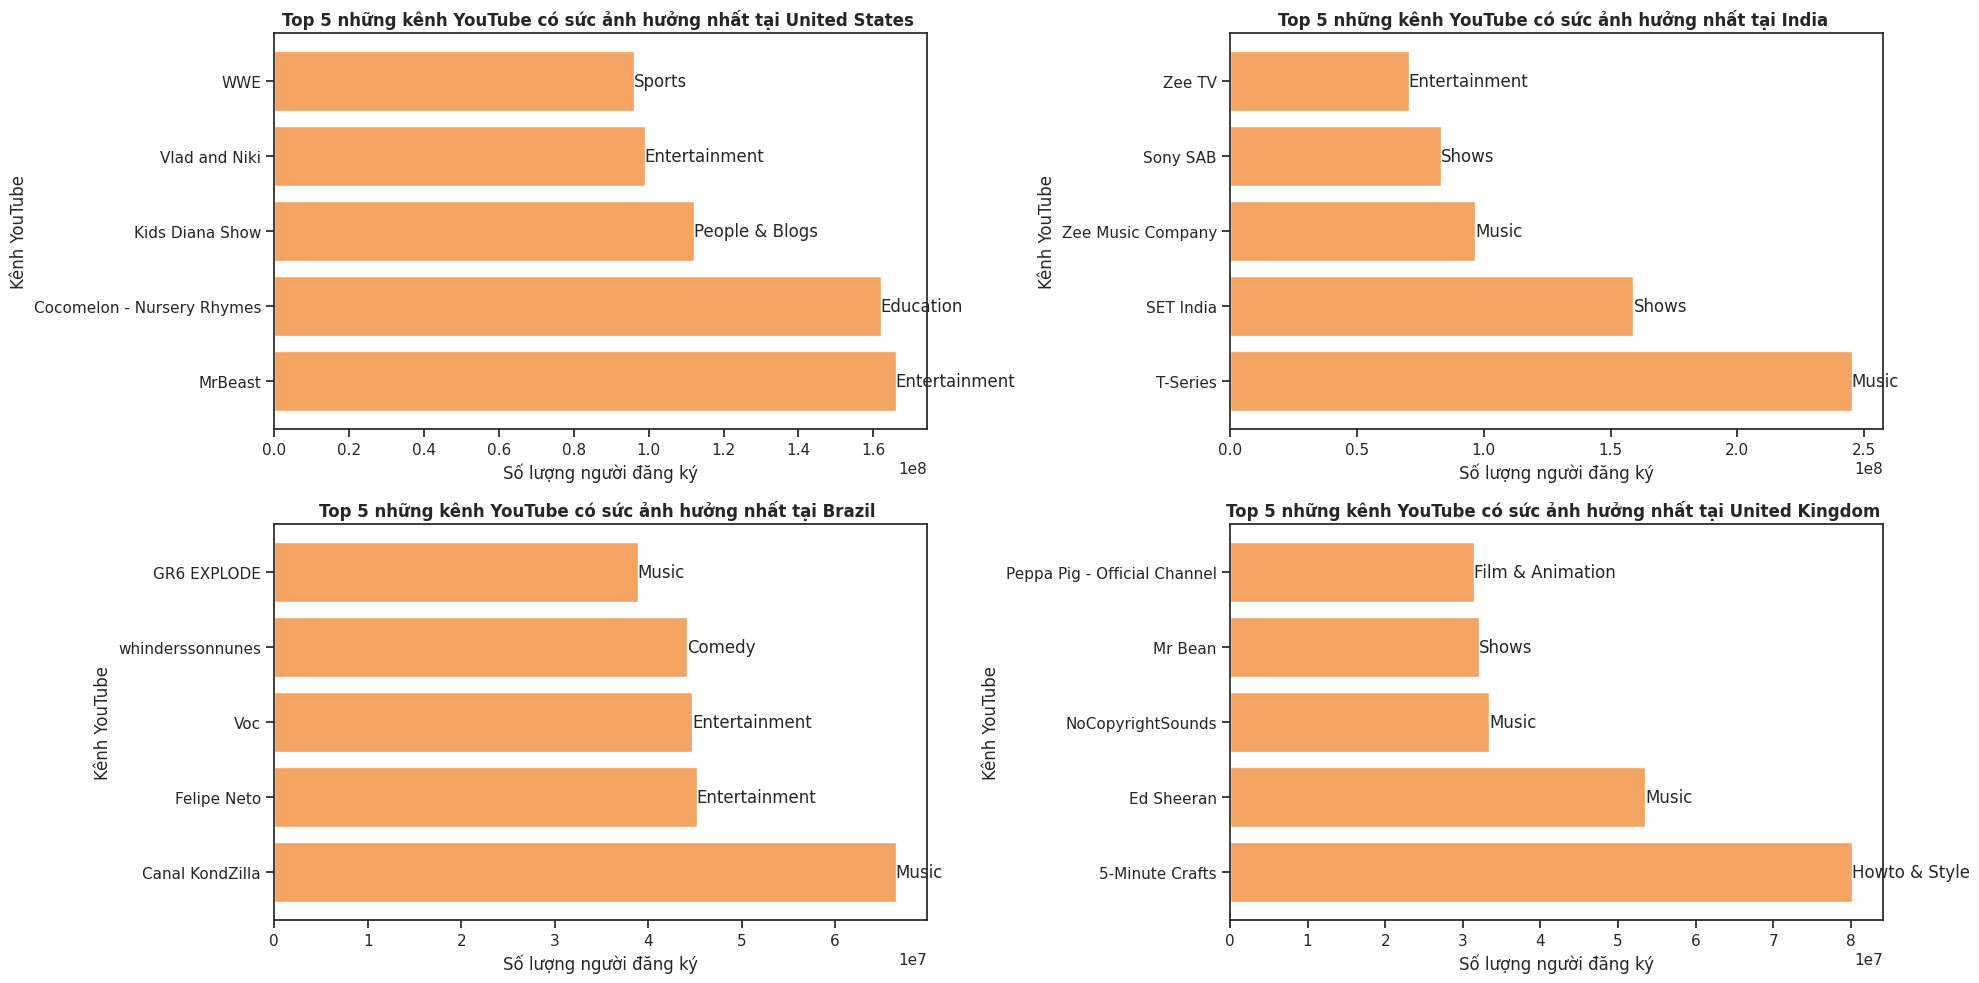

In [ ]:
## Những kênh nổi bật trong top 4 quốc gia đứng đầu
country_list = ['United States', 'India','Brazil','United Kingdom']
fig, axs =  plt.subplots(2, 2, figsize=(20, 10))
for i, country in enumerate(country_list):
    ax = axs[i//2, i%2]
    df_country = df[df['Country'] == country]
    df_country = df_country.sort_values(by='Subscribers', ascending=False)
    df_country = df_country.head(5)

    ax.barh(df_country['Youtuber'], df_country['Subscribers'], color='sandybrown')

    for i, youtuber in enumerate(df_country['Youtuber']):
      category = df_country.iloc[i]['Category']
      ax.text(df_country.iloc[i]['Subscribers'], i, f'{category}', va='center')

    ax.set_xlabel('Số lượng người đăng ký')
    ax.set_ylabel('Kênh YouTube')
    ax.set_title(f'Top 5 những kênh YouTube có sức ảnh hưởng nhất tại {country} ', weight = 'bold')

plt.subplots_adjust(left = 0.2, wspace = 0.5, hspace=0.5)
plt.tight_layout()
plt.show()

Chọn ra 4 quốc gia đứng đầu với số lượng Subscribers cao nhất và phân tích phân phối người theo dõi theo danh mục,có thể thấy rằng hầu hết các quốc gia ưa thích các kênh âm nhạc, theo sau đó là Giải trí.

#### Trending Topics

Hệ số tương quan giữa Account Lifetime và Video Views: 0.14323788211684005
Hệ số tương quan giữa Account Lifetime và Subscribers: 0.1353087605044854


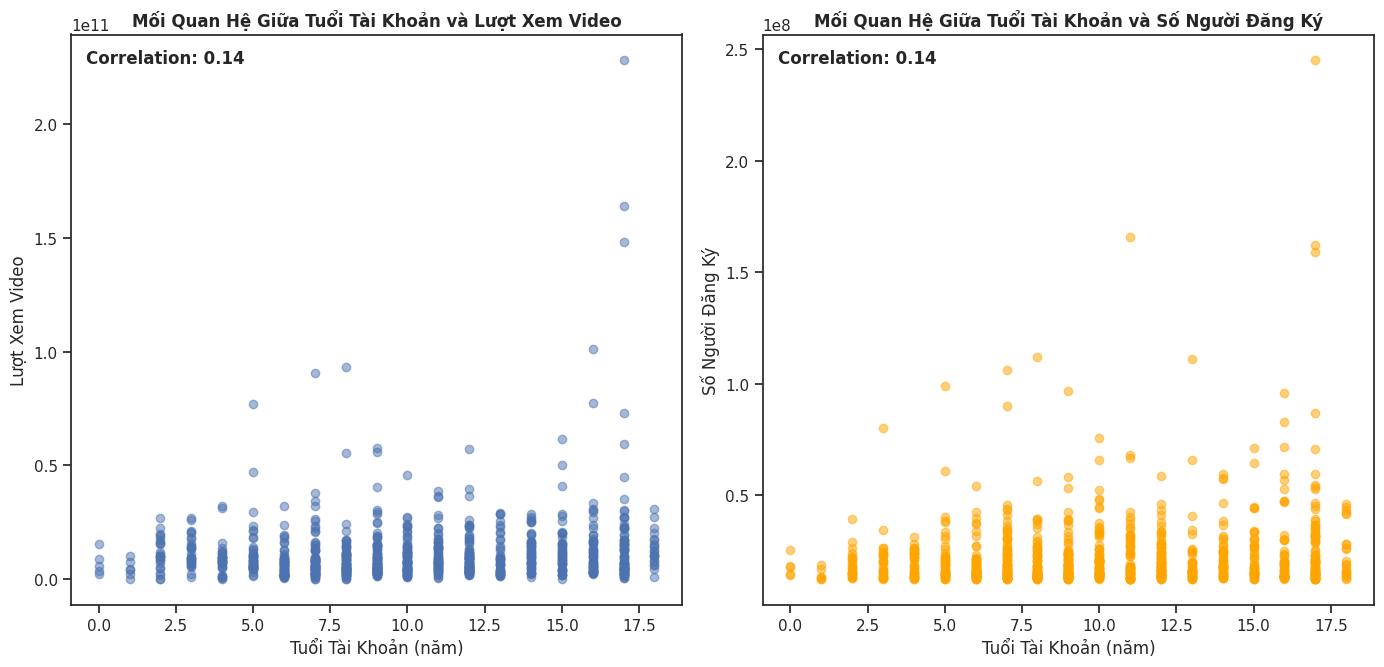

In [ ]:
# Tính hệ số tương quan giữa 'Account Lifetime' và 'Video Views'
correlation_views = df['Account Lifetime'].corr(df['Video Views'])
# Tính hệ số tương quan giữa 'Account Lifetime' và 'Subscribers'
correlation_subs = df['Account Lifetime'].corr(df['Subscribers'])

# In ra hệ số tương quan
print('Hệ số tương quan giữa Account Lifetime và Video Views:', correlation_views)
print('Hệ số tương quan giữa Account Lifetime và Subscribers:', correlation_subs)

# Vẽ biểu đồ scatter plot để trực quan hóa mối quan hệ giữa 'Account Lifetime' và 'Video Views'
plt.figure(figsize=(14, 7))

# Biểu đồ cho 'Account Lifetime' vs 'Video Views'
plt.subplot(1, 2, 1)  # 1 hàng, 2 cột, biểu đồ thứ nhất
plt.scatter(df['Account Lifetime'], df['Video Views'], alpha=0.5)
plt.title('Mối Quan Hệ Giữa Tuổi Tài Khoản và Lượt Xem Video', weight ='bold')
plt.xlabel('Tuổi Tài Khoản (năm)')
plt.ylabel('Lượt Xem Video')
plt.annotate(f'Correlation: {correlation_views:.2f}',
             xy = (0.025, 0.95),
             xycoords = 'axes fraction',
             fontsize = 12,
             weight = 'bold')

# Biểu đồ cho 'Account Lifetime' vs 'Subscribers'
plt.subplot(1, 2, 2)  # 1 hàng, 2 cột, biểu đồ thứ hai
plt.scatter(df['Account Lifetime'], df['Subscribers'], alpha=0.5, color='orange')
plt.title('Mối Quan Hệ Giữa Tuổi Tài Khoản và Số Người Đăng Ký', weight = 'bold')
plt.xlabel('Tuổi Tài Khoản (năm)')
plt.ylabel('Số Người Đăng Ký')
plt.annotate(f'Correlation: {correlation_subs:.2f}',
             xy = (0.025, 0.95),
             xycoords = 'axes fraction',
             fontsize = 12,
             weight = 'bold')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()



1.  **Biểu đồ giữa 'Tuổi Tài Khoản' và 'Lượt Xem Video'**: Biểu đồ cho thấy một mối quan hệ rất yếu giữa tuổi của tài khoản (thời gian kể từ khi tài khoản được tạo) và tổng số lượt xem video. Các điểm dữ liệu phân tán rộng và không theo một xu hướng rõ ràng nào, cho thấy rằng không có một mối quan hệ mạnh mẽ giữa tuổi tài khoản và số lượt xem video. Điều này có thể được hiểu là việc một kênh có tồn tại lâu hơn không nhất thiết dẫn đến việc nó sẽ có nhiều lượt xem hơn, vì có nhiều yếu tố khác như nội dung, xu hướng và cách thức tiếp cận khán giả cũng đóng vai trò quan trọng.

2. **Biểu đồ giữa 'Tuổi Tài Khoản' và 'Số Người Đăng Ký'**: Tương tự như biểu đồ trước, mối quan hệ giữa tuổi tài khoản và số người đăng ký cũng rất yếu. Mặc dù có một xu hướng nhẹ rằng các tài khoản lâu năm có thể có số lượng người đăng ký nhiều hơn một chút, nhưng mối quan hệ này không đủ mạnh để khẳng định rằng tuổi tài khoản là một yếu tố quyết định số lượng người đăng ký



---



> **Kết luận:** Cả hai biểu đồ đều cho thấy rằng thời gian tồn tại của một kênh YouTube không đóng một vai trò quan trọng trong việc xác định tổng số lượt xem video hoặc số lượng người đăng ký. Các kênh YouTube cần phải tập trung vào các yếu tố khác như chất lượng nội dung, tần suất đăng tải, và việc tương tác với cộng đồng để tăng cả lượt xem và số người đăng ký, hơn là chỉ dựa vào thời gian tồn tại trên nền tảng.



In [ ]:
creation_count = df.groupby('Created Year').size().reset_index()
creation_count.columns = ['Year', 'Channel Count']

fig = px.bar(creation_count, x='Year', y='Channel Count', text_auto='.2s',
              title='Số lượng kênh mới theo thời gian',color_discrete_sequence=['rgb(136, 191, 219)'])

fig.update_xaxes(title_text='Năm')
fig.update_yaxes(title_text='Số lượng')
fig.update_layout(plot_bgcolor='white'
                  , title_x=0.5  # Vị trí của tiêu đề theo trục x, giữa trang (giá trị từ 0 đến 1)
                  , title_y=0.9  # Vị trí của tiêu đề theo trục y, trên trang (giá trị từ 0 đến 1)
                    )

fig.show()

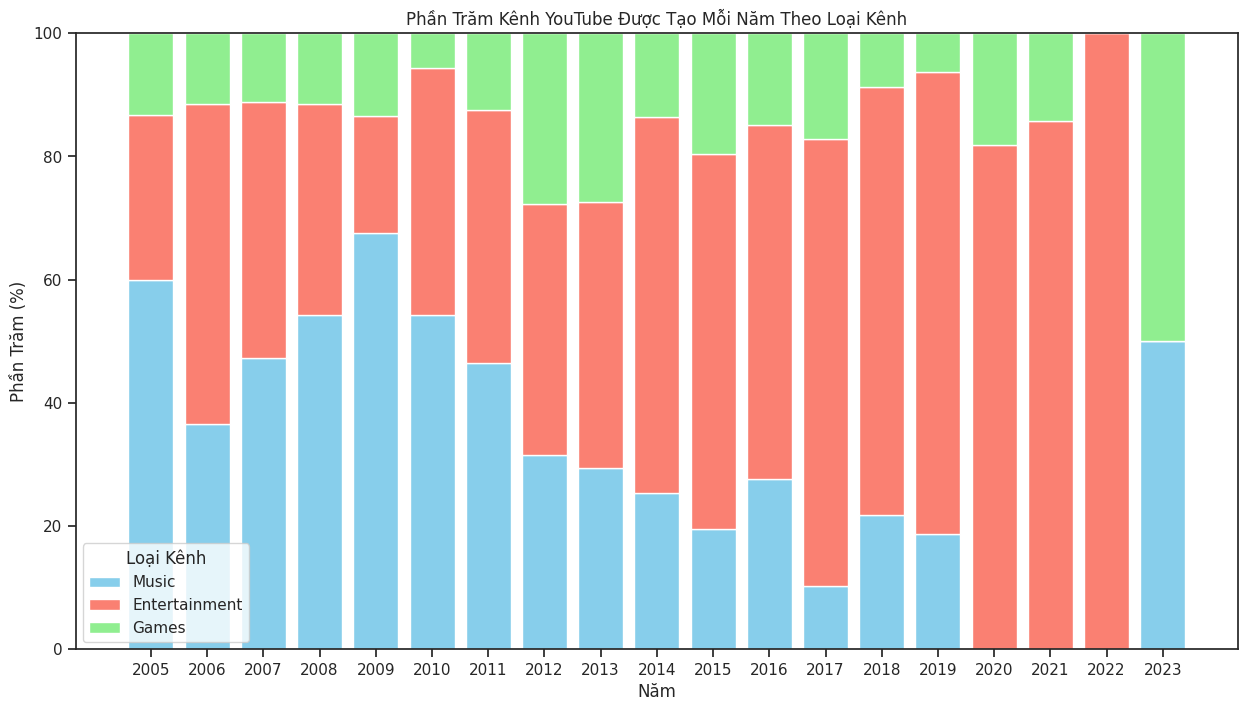

In [ ]:
# Lọc ra các kênh thuộc các loại 'Music', 'Entertainment', và 'Games'
channel_types = ['Music', 'Entertainment', 'Games']
filtered_df = df[df['Channel Type'].isin(channel_types)]

# Nhóm dữ liệu theo 'Created Year' và 'Channel Type', sau đó đếm số lượng
count_by_year_and_type = filtered_df.groupby(['Created Year', 'Channel Type']).size().unstack(fill_value=0)

# Tính tổng số kênh cho mỗi năm
total_by_year = count_by_year_and_type.sum(axis=1)

# Chuyển đổi số lượng kênh của mỗi loại thành phần trăm so với tổng số kênh trong mỗi năm
percentage_by_year_and_type = count_by_year_and_type.divide(total_by_year, axis=0) * 100

# Chuyển đổi chỉ số (index) của DataFrame thành số nguyên để hiển thị trên trục X
percentage_by_year_and_type.index = percentage_by_year_and_type.index.astype(int)

# Tạo biểu đồ cột chồng với dữ liệu phần trăm
plt.figure(figsize=(15, 8))

# Chọn màu sắc cho các loại kênh
colors = ['skyblue', 'salmon', 'lightgreen']

# Tạo cột chồng cho mỗi loại kênh với dữ liệu phần trăm
bottom = None
for i, channel_type in enumerate(channel_types):
    if channel_type in percentage_by_year_and_type:
        plt.bar(percentage_by_year_and_type.index,
                percentage_by_year_and_type[channel_type],
                bottom=bottom,
                label=channel_type,
                color=colors[i])
        bottom = percentage_by_year_and_type[channel_type] if bottom is None else bottom + percentage_by_year_and_type[channel_type]

# Thiết lập nhãn cho trục X là các năm dưới dạng số nguyên
years = percentage_by_year_and_type.index
plt.xticks(years, [str(year) for year in years])

# Thêm tiêu đề và nhãn cho trục X, Y
plt.title('Phần Trăm Kênh YouTube Được Tạo Mỗi Năm Theo Loại Kênh')
plt.xlabel('Năm')
plt.ylabel('Phần Trăm (%)')

# Thêm chú giải (legend)
plt.legend(title='Loại Kênh')

# Hiển thị biểu đồ
plt.show()

#### Earnings Analysis

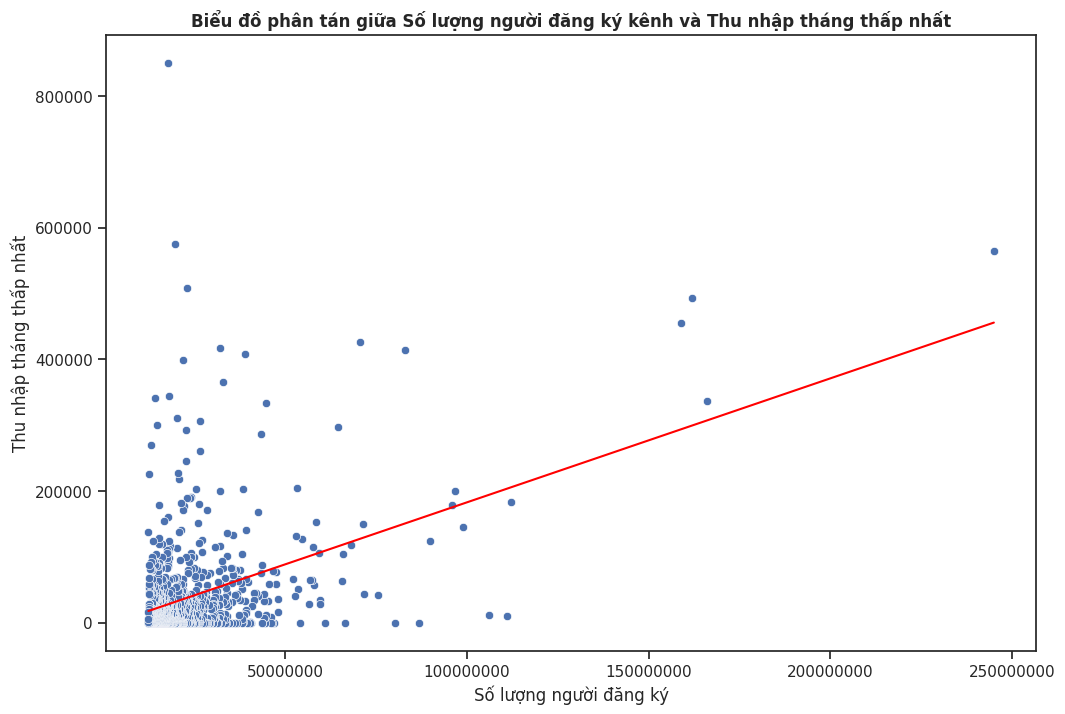

In [ ]:
##  Tạo đường xu hướng
m, b = np.polyfit(df['Subscribers'], df['Lowest Monthly Earnings'], 1)

plt.subplots(figsize=(12, 8))
earnings_vs_subscribers = sns.scatterplot(x='Subscribers', y='Lowest Monthly Earnings', data=df)
plt.plot(df['Subscribers'], m * df['Subscribers'] + b, color = '#FF0000')
plt.title('Biểu đồ phân tán giữa Số lượng người đăng ký kênh và Thu nhập tháng thấp nhất', weight = 'bold')
plt.xlabel('Số lượng người đăng ký')
plt.ylabel('Thu nhập tháng thấp nhất')
plt.ticklabel_format(style='plain', axis='x')

plt.show()

Khi xem xét Thu nhập so với Người đăng ký có mối quan hệ tích cực giữa hai biến số. Khi số lượng người đăng ký tăng lên thì thu nhập cũng tăng lên. Tuy nhiên, có một số ngoại lệ trong dữ liệu. Ví dụ: có một số kênh có số lượng người đăng ký cao nhưng thu nhập thấp. Điều này có thể là do kênh này mới và chưa bắt đầu kiếm tiền. Ngoài ra còn có một số kênh có lượng người đăng ký thấp nhưng thu nhập cao. Điều này có thể là do kênh này đã cũ và đã kiếm được rất nhiều tiền.

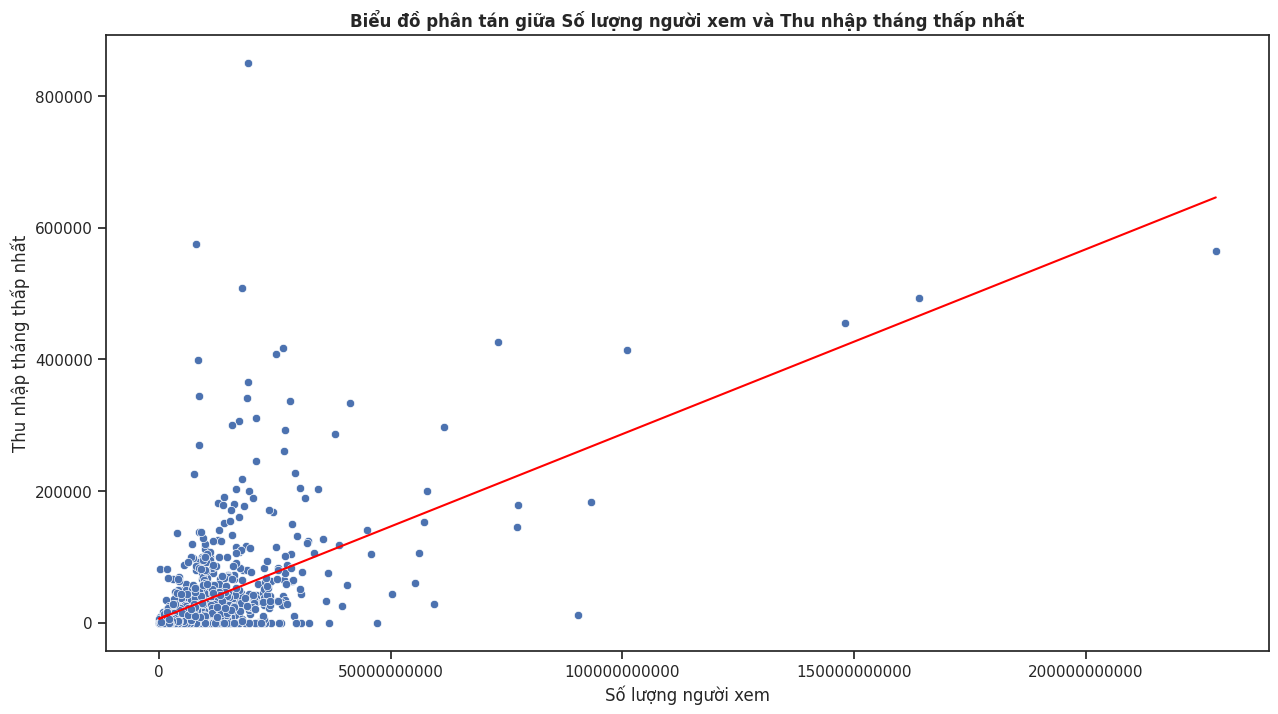

In [ ]:
##  Tạo đường xu hướng
m, b = np.polyfit(df['Video Views'], df['Lowest Monthly Earnings'], 1)

plt.subplots(figsize=(15, 8))
earnings_vs_video_views = sns.scatterplot(x='Video Views', y='Lowest Monthly Earnings', data=df)
plt.plot(df['Video Views'], m * df['Video Views'] + b, color = '#FF0000')

plt.title('Biểu đồ phân tán giữa Số lượng người xem và Thu nhập tháng thấp nhất', weight ='bold')
plt.xlabel('Số lượng người xem')
plt.ylabel('Thu nhập tháng thấp nhất')
plt.ticklabel_format(style='plain', axis='x')

plt.show()

Phân tích Thu nhập so với Lượt xem video của những người sáng tạo hàng đầu, nhận thấy rằng có mối tương quan tích cực giữa hai biến số. Khi lượt xem video tăng lên, thu nhập cũng tăng lên. Điều này hợp lý vì video càng nhận được nhiều lượt xem thì càng hiển thị nhiều quảng cáo và người sáng tạo nội dung càng kiếm được nhiều tiền.

In [ ]:
## Danh mục nào có khả năng sinh lợi cao nhất dựa trên mức trung bình Thu nhập hàng tháng
df['Avg. Monthly Earnings'] = (df['Lowest Monthly Earnings'] + df['Highest Monthly Earnings']) / 2

# Create new df to group by category & calculate mean avg. monthly earnings by category
category_avg_earnings = df.groupby('Category').agg({
    'Avg. Monthly Earnings': 'mean',
    }).reset_index()

# Create new column to reflect avg. monthly earnings in thousands, rounded down to nearest whole number
category_avg_earnings['Avg. Monthly Earnings ($000s)'] = (category_avg_earnings['Avg. Monthly Earnings'] / 1000).astype(int)
category_avg_earnings

# Sort categories by no. Subscribers (mn.)
category_avg_earnings = category_avg_earnings.sort_values(by = 'Avg. Monthly Earnings ($000s)', ascending = False)

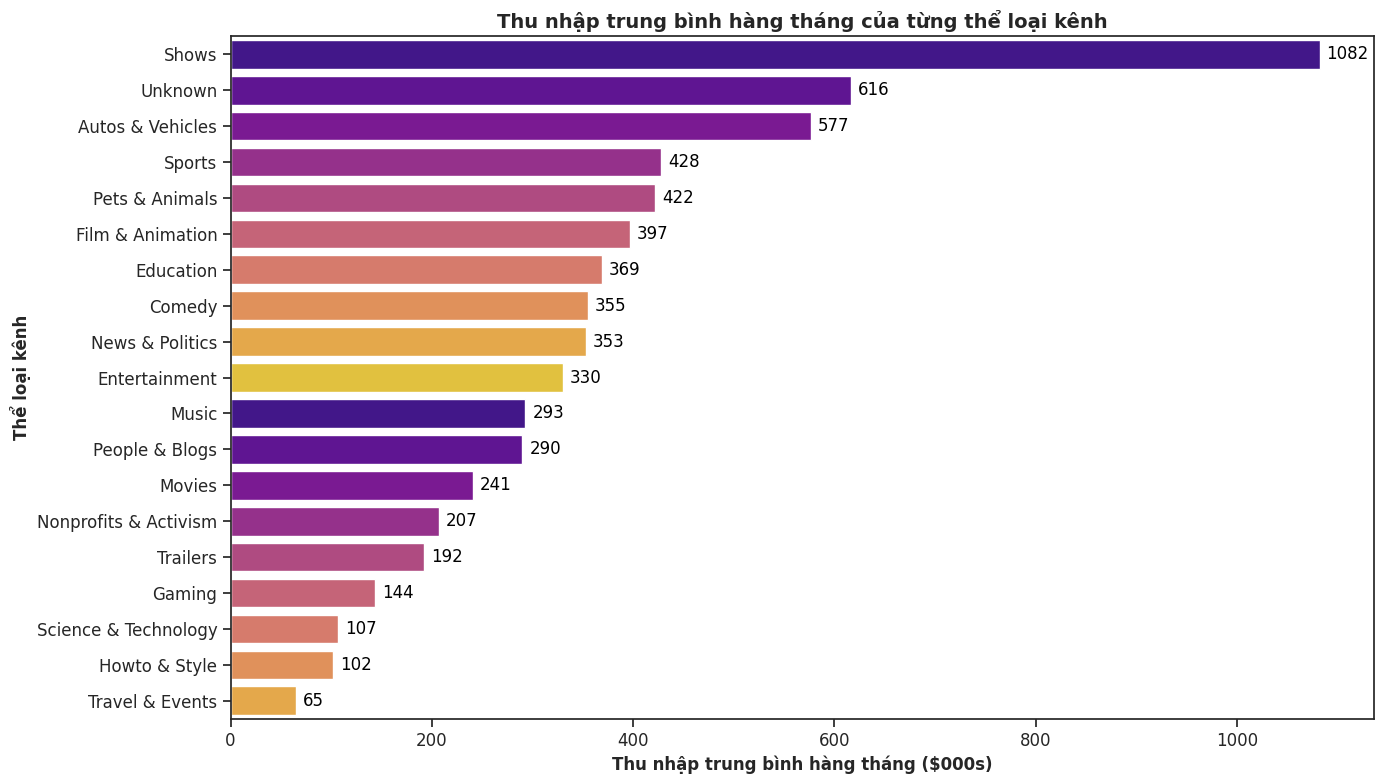

In [ ]:
plt.subplots(figsize=(14, 8))
ax = sns.barplot(x = 'Avg. Monthly Earnings ($000s)', y = 'Category',data = category_avg_earnings
                  , palette=sns.color_palette("plasma", 10), orient = 'h')
# Add data labels above the bars
for bar in ax.containers:
    ax.bar_label(bar, label_type = 'edge', color = 'black', fontsize = 12, padding = 5)

# Adjusting the chart formatting
plt.title('Thu nhập trung bình hàng tháng của từng thể loại kênh', fontsize = 14, weight = 'bold')
plt.ylabel('Thể loại kênh', fontsize = 12,  weight = 'bold')
plt.xlabel('Thu nhập trung bình hàng tháng ($000s)', fontsize = 12, weight = 'bold')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.tight_layout()
plt.show()

* Thể loại  'Shows' nổi bật đáng kể về khả năng kiếm tiền của kênh. Nó  có thu nhập trung bình hàng tháng cao hơn khoảng 50% so với đối thủ cạnh tranh gần nhất, khẳng định chắc chắn rằng nó là kênh vượt trội trong việc tạo doanh thu

* Mặc dù các phân tích xu hướng trước đây chỉ ra rằng 'Âm nhạc' và 'Giải trí' là những danh mục phổ biến hàng đầu, nhưng đáng ngạc nhiên là chúng lại nằm ở mức trung bình đến thấp hơn khi xét đến thu nhập trung bình hàng tháng. Sự khác biệt này đặt ra những câu hỏi  về mối quan hệ giữa lượng người xem, mức độ phổ biến và tiềm năng doanh thu trên nền tảng này

* Đối với những người sáng tạo đầy tham vọng, việc chọn một vị trí thích hợp chỉ dựa trên mức độ phổ biến của kênh có thể không mang lại doanh thu cao hơn. Nếu kiếm tiền là mục tiêu chính thì việc nghiên cứu kỹ hơn các thể loại có thu nhập cao, thay vì chỉ những thể loại phổ biến, sẽ mang lại cách tiếp cận chiến lược hơn cho việc tạo kênh

## Machine Learning

#### Channel Segmentation by Country and (Subscriber; Video Views; Uploads; Account Lifetime) - K-Prototypes

##### Xử lý outlier

In [ ]:
machine_df = df[['Country', 'Video Views', 'Channel Type', 'Account Lifetime','Youtuber','Subscribers', 'Uploads']]
machine_df = machine_df.reset_index(drop=True)
machine_df

Country   Video Views   Channel Type  Account Lifetime  \
0             India  228000000000          Music                17   
1     United States   28368841870  Entertainment                11   
2     United States  164000000000      Education                17   
3             India  148000000000  Entertainment                17   
4     United States   93247040539  Entertainment                 8   
..              ...           ...            ...               ...   
981          Brazil    9029609749  Entertainment                 6   
982           India    1674409945          Games                 5   
983  United Kingdom    2214684303          Games                17   
984          Sweden     374123483          Games                11   
985           India    2129773714         Comedy                 6   

                       Youtuber  Subscribers   Uploads  
0                      T-Series    245000000   20082.0  
1                       MrBeast    166000000     741.0  
2    Cocomelon - Nursery Rhymes    162000000     966.0  
3                     SET India    159000000  116536.0  
4               Kids Diana Show    112000000    1111.0  
..                          ...          ...       ...  
981                 Natan por A     12300000    1200.0  
982    Free Fire India Official     12300000    1500.0  
983                       Panda     12300000    2452.0  
984                 RobTopGames     12300000      39.0  
985                Make Joke Of     12300000      62.0  

[986 rows x 7 columns]

In [ ]:
exclude = ['Youtuber', 'Country', 'Channel Type']
count_outliers = 0

for col in machine_df.columns:
    if col not in exclude:
        outliers, z_scores = check_outliers(machine_df[col])
        if len(outliers) > 0:
            count_outliers += len(outliers)
            print(f'Có {len(outliers)} outliers trong cột {col}')
        else:
            print(f'Không có outliers trong cột {col}')

print(f'Có tổng cộng {count_outliers} outliers trong bộ dữ liệu')

Có 15 outliers trong cột Video Views
Không có outliers trong cột Account Lifetime
Có 15 outliers trong cột Subscribers
Có 27 outliers trong cột Uploads
Có tổng cộng 57 outliers trong bộ dữ liệu


In [ ]:
#Xóa outliers
def remove_outliers(df, columns):
    df_cleaned = df.copy()
    for col in columns:
        outliers, _ = check_outliers(df_cleaned[col])
        df_cleaned = df_cleaned[~np.isin(df_cleaned[col], outliers)]
    df_cleaned = df_cleaned.dropna()
    return df_cleaned

In [ ]:
columns_to_remove_outliers = ['Video Views', 'Account Lifetime','Subscribers', 'Uploads']
machine_df_cleaned = remove_outliers(machine_df,columns_to_remove_outliers)

In [ ]:
machine_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 928 entries, 32 to 985
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           928 non-null    object 
 1   Video Views       928 non-null    int64  
 2   Channel Type      928 non-null    object 
 3   Account Lifetime  928 non-null    int64  
 4   Youtuber          928 non-null    object 
 5   Subscribers       928 non-null    int64  
 6   Uploads           928 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.0+ KB


##### Xây dựng mô hình

In [ ]:
#-Đầu tiên ta sẽ gán nhãn thuộc tính country thành USA (United States of America) và non-USA (các quốc gia khác):
df3 = machine_df_cleaned[['Youtuber','Country','Subscribers', 'Video Views', 'Uploads', 'Account Lifetime']]

usa_countries = ['United States']

# Tạo điều kiện cho mỗi nhóm
conditions = [
    df3['Country'].isin(usa_countries)
]

# Đặt nhãn cho mỗi điều kiện tương ứng
labels = ['US']
# Sử dụng np.select để gán nhãn
df3['Country'] = np.select(conditions, labels, default='Non-US')
df3

<ipython-input-122-14576e549b61>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Youtuber Country  Subscribers  \
32                                          Marshmello      US     56400000   
33                                                 YRF  Non-US     54600000   
34   LooLoo Kids - Nursery Rhymes and Children's Songs  Non-US     54000000   
35                                          Ed Sheeran  Non-US     53500000   
36                                   Infobells - Hindi  Non-US     53300000   
..                                                 ...     ...          ...   
981                                        Natan por A  Non-US     12300000   
982                           Free Fire India Official  Non-US     12300000   
983                                              Panda  Non-US     12300000   
984                                        RobTopGames  Non-US     12300000   
985                                       Make Joke Of  Non-US     12300000   

     Video Views  Uploads  Account Lifetime  
32   14696003229    436.0                 8  
33   35302243691   3707.0                17  
34   32312431239     11.0                 6  
35   30367676736    383.0                17  
36   30516172739    577.0                 9  
..           ...      ...               ...  
981   9029609749   1200.0                 6  
982   1674409945   1500.0                 5  
983   2214684303   2452.0                17  
984    374123483     39.0                11  
985   2129773714     62.0                 6  

[928 rows x 6 columns]

array([[<Axes: title={'center': 'Subscribers'}>,
        <Axes: title={'center': 'Video Views'}>],
       [<Axes: title={'center': 'Uploads'}>,
        <Axes: title={'center': 'Account Lifetime'}>]], dtype=object)

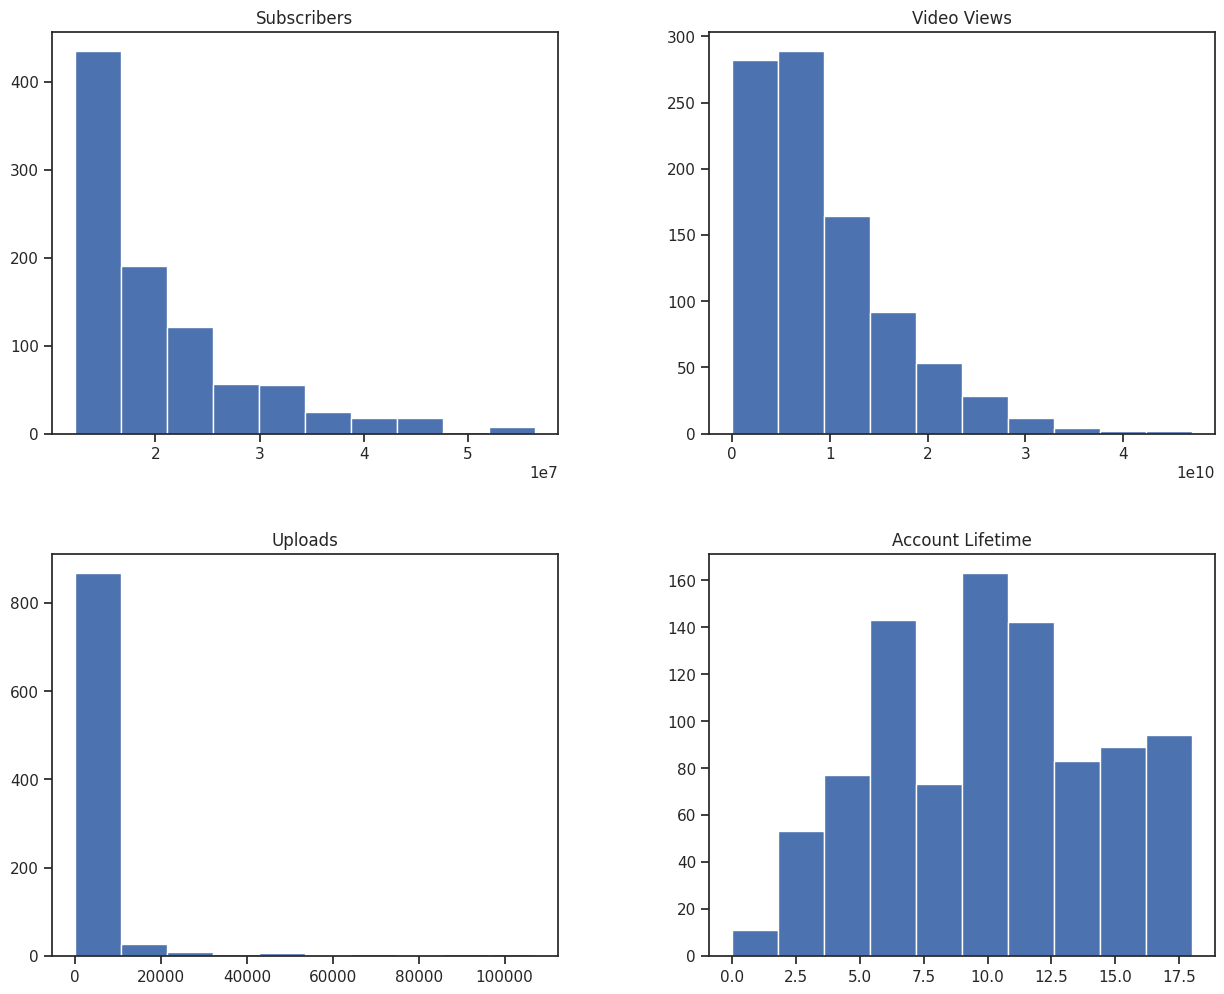

In [ ]:
df3.hist(figsize = (15,12), grid = False)

Ta tiến hành chuẩn hóa dữ liệu cho các thuộc tính numeric bằng cách scale dữ liệu về một phân bố, trong đó giá trị trung bình của các quan sát bằng 0 và độ lệch chuẩn bằng 1, giúp giảm thiểu dữ liệu dư thừa, cải thiện quá trình phân cụm

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler

In [ ]:
## Chuẩn hoá dữ liệu các thuộc tính numeric đầu ra
Scaler = StandardScaler()
df3.iloc[:,2:] = Scaler.fit_transform(df3.iloc[:,2:])
syms = df3.iloc[:,0].values.astype(str)
D = df3.iloc[:,1:].values.astype(object)

<ipython-input-125-f1f73b0c5123>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



* Sử dụng phương pháp K-Prototypes - thuật toán cải tiến của K-Means để làm việc với các tập dữ liệu hỗn hợp (thuộc tính số và thuộc tính phân lớp)
* Ta tiến hành tìm số phân cụm tối ưu k bằng cách chạy vòng lặp với số cụm k từ 2 đến 8 để tìm ra số k phân cụm tối ưu bằng phương pháp Elbow.

In [ ]:
!pip install kmodes
!pip install yellowbrick

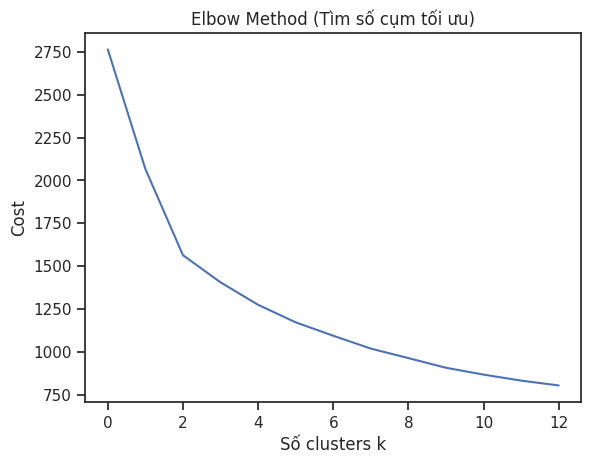

In [ ]:
from kmodes.kprototypes import KPrototypes
cost = []
for k in range(2,15):
  kproto = KPrototypes(n_clusters = k, init = 'Cao')
  clusters = kproto.fit_predict(D, categorical = [0])
  #print('Số clusters:', k)
  #print('     cost (khoảng cách các điểm dữ liệu đến trọng tâm cụm):', kproto.cost_)
  cost.append(kproto.cost_)

plt.xlabel('Số clusters k')
plt.ylabel('Cost')
plt.title('Elbow Method (Tìm số cụm tối ưu)')
plt.plot(cost)

In [ ]:
#Phân cụm bằng KPrototypes với k = 2
kproto = KPrototypes(n_clusters = 2, init = 'Cao')
clusters = kproto.fit_predict(D, categorical = [0])
print('Cluster Centers: \n', kproto.cluster_centroids_)

Cluster Centers: 
 [['1.41280439198719' '1.3729411791691346' '0.5693150966035884'
  '0.3878517628895691' 'Non-US']
 ['-0.38319899947049896' '-0.37238678558286087' '-0.1544169714075487'
  '-0.10519814938648546' 'Non-US']]


In [ ]:
# Chuẩn hóa dữ liệu về giá trị ban đầu
Clustered = pd.DataFrame(data = Scaler.inverse_transform(df3.iloc[:,2:]),columns = ['Avg. Subscribers','Avg. Video Views','Avg. Uploads', 'Avg. Account Lifetime'])
Clustered['Country'] = D[:,0]
Clustered['Youtuber'] = syms
Clustered['Cluster'] = clusters
# Hiển thị số lượng và giá trị trung bình theo Cluster và Country
print(Clustered.groupby(['Cluster', 'Country']).count()['Avg. Subscribers'], '\n\n')
print(Clustered.groupby(['Cluster', 'Country']).mean())

Cluster  Country
0        Non-US     131
         US          67
1        Non-US     500
         US         230
Name: Avg. Subscribers, dtype: int64 


                 Avg. Subscribers  Avg. Video Views  Avg. Uploads  \
Cluster Country                                                     
0       Non-US       3.252824e+07      1.869232e+10  14423.343511   
        US           3.113881e+07      1.998086e+10   4287.746269   
1       Non-US       1.703140e+07      6.389606e+09   2208.624000   
        US           1.728870e+07      7.277911e+09   1632.756522   

                 Avg. Account Lifetime  
Cluster Country                         
0       Non-US               11.687023  
        US                   11.791045  
1       Non-US                9.064000  
        US                   10.708696  


<ipython-input-129-5123e5884ca0>:8: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



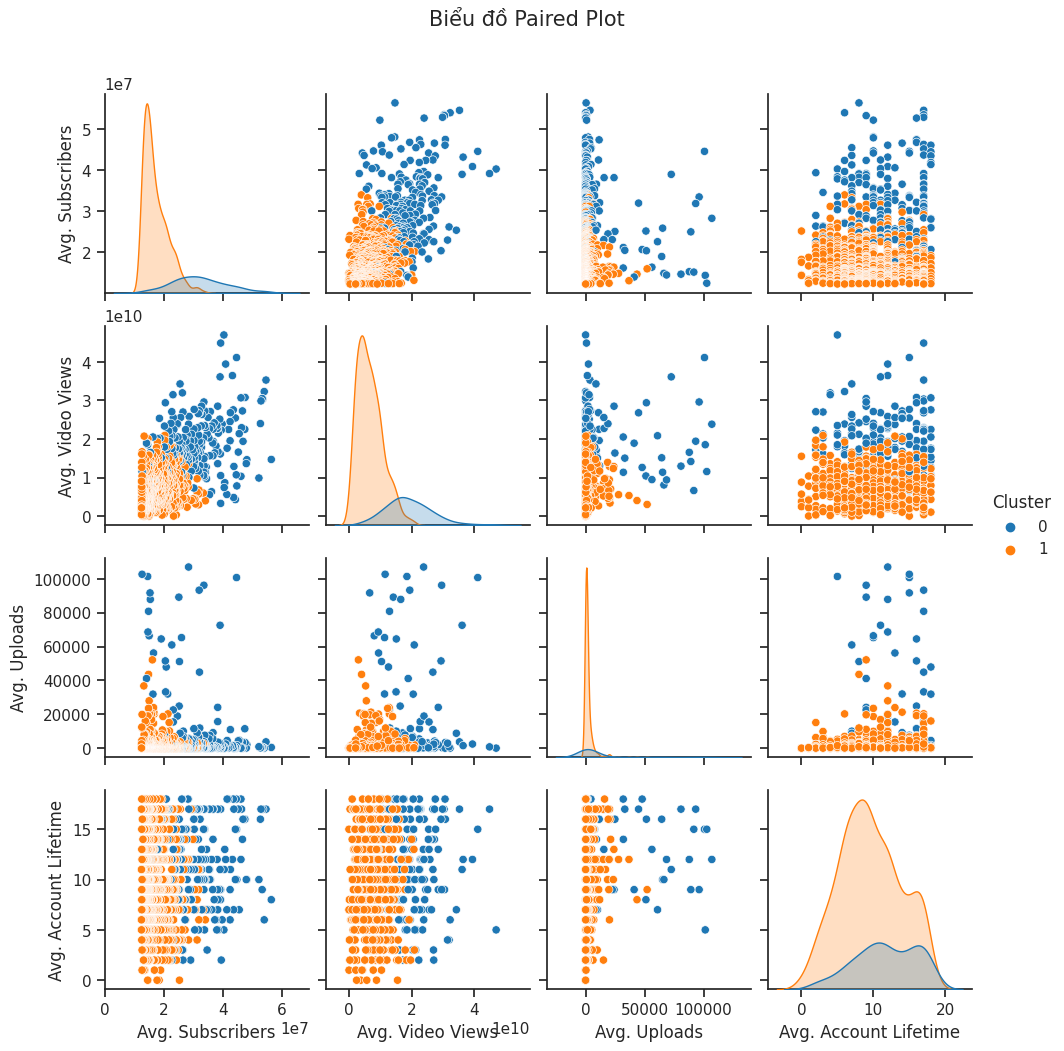

In [ ]:
sns.pairplot(Clustered.drop(columns = ['Country','Youtuber']), hue = 'Cluster',palette = 'tab10')
plt.suptitle('Biểu đồ Paired Plot', fontsize = 15, y =1.05)
plt.show()

Nhận xét: Ta có thể thấy cách các cụm được phân phối theo từng biến trong biểu đồ phân tán.
* Trong cụm thứ nhất
* Trong cụm thứ hai

##### Hồi quy tuyến tính

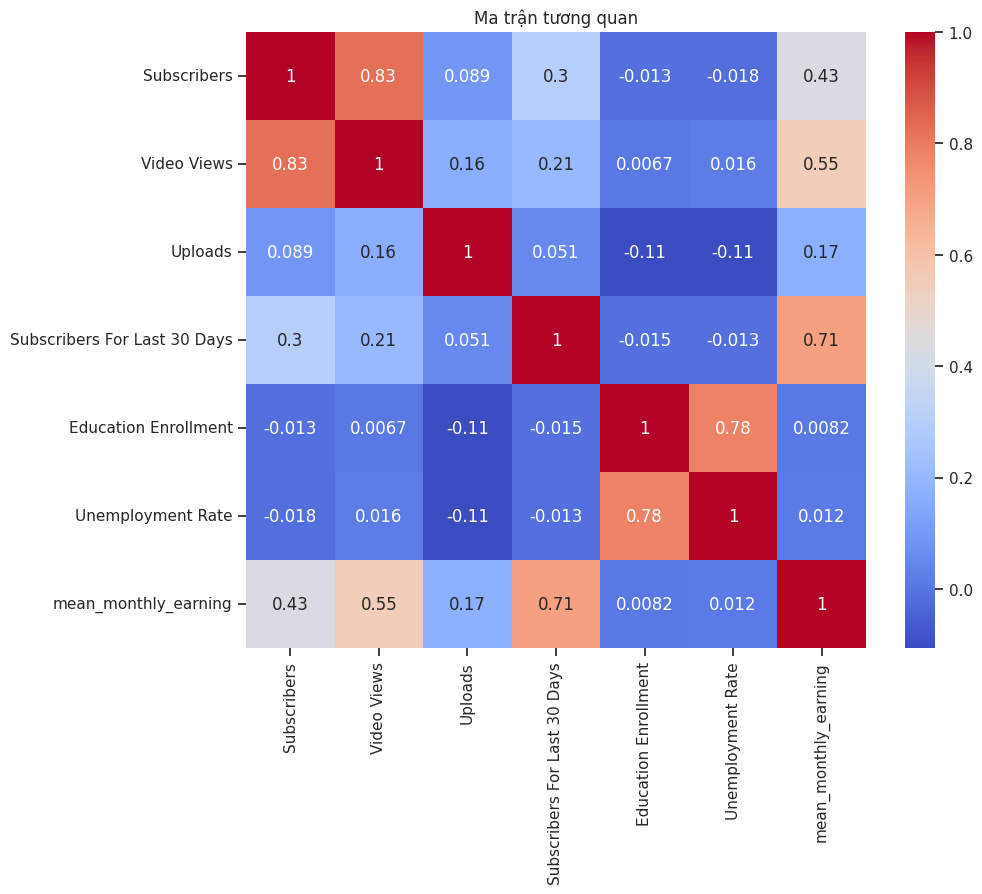

In [ ]:

# Đầu tiên, nhập các thư viện cần thiết

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder


# Tính giá trị trung bình của thu nhập hàng tháng
df['mean_monthly_earning'] = (df['Lowest Monthly Earnings'] + df['Highest Monthly Earnings']) / 2

# Chọn các biến số lượng và phân loại tiềm năng
numerical_vars = ['Subscribers', 'Video Views', 'Uploads', 'Subscribers For Last 30 Days',
                  'Education Enrollment', 'Unemployment Rate', 'mean_monthly_earning']
categorical_vars = ['Category', 'Country', 'Channel Type']

# Phân tích tương quan giữa các biến số lượng
corr_matrix = df[numerical_vars].corr()

# Vẽ ma trận tương quan
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Ma trận tương quan")
plt.show()




In [ ]:
# Mã hóa one-hot cho các biến phân loại
one_hot_encoder = OneHotEncoder(sparse=False, drop='first')  # loại bỏ một giá trị để tránh đa cộng tuyến
categorical_encoded = one_hot_encoder.fit_transform(df[categorical_vars])

# Tạo DataFrame từ các biến đã mã hóa
categorical_encoded_df = pd.DataFrame(categorical_encoded,
                                      columns=one_hot_encoder.get_feature_names_out(categorical_vars))

# Kết hợp các biến số lượng và biến đã mã hóa
model_data = pd.concat([df[numerical_vars], categorical_encoded_df], axis=1)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X = model_data.drop('mean_monthly_earning', axis=1)
y = model_data['mean_monthly_earning']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xây dựng mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



LinearRegression()

In [ ]:
# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

# In kết quả đánh giá
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Root Mean Squared Error: {rmse}")


Mean Squared Error: 75834315616.81174
R-squared: 0.6536375049252885
Root Mean Squared Error: 275380.3108735476


##### Mô hình phân cụm

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

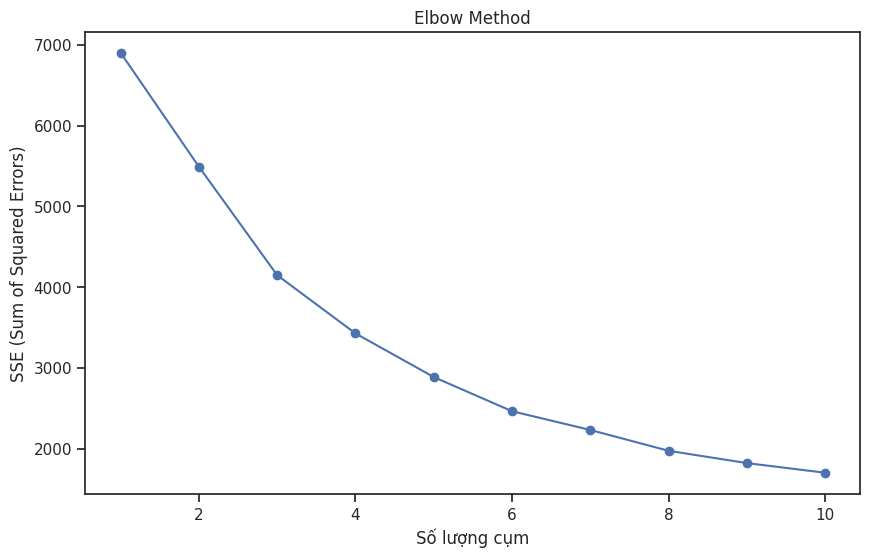

In [ ]:
# Import các thư viện cần thiết
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt



# Chuẩn hóa dữ liệu sử dụng các biến số lượng
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numerical_vars])

# Sử dụng Elbow Method để xác định số lượng cụm tối ưu
sse = []  # Tạo danh sách để lưu tổng bình phương sai số của các cụm
for k in range(1, 11):  # Thử nghiệm với số lượng cụm từ 1 đến 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

# Vẽ đồ thị Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Số lượng cụm')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.show()




In [ ]:
# Xây dựng mô hình K-means với 4 cụm (dựa trên đồ thị Elbow Method)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Thêm cột 'Cluster' vào DataFrame ban đầu để quan sát các cụm
df['Cluster'] = clusters

# Tổng kết dữ liệu theo từng cụm
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary[numerical_vars + ['mean_monthly_earning']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



          Subscribers   Video Views        Uploads  \
Cluster                                              
0        2.301724e+07  1.533216e+10  180106.586207   
1        2.144390e+07  9.251503e+09    4188.066519   
2        2.062309e+07  9.883272e+09    2454.966102   
3        6.465294e+07  4.998128e+10   25581.941176   

         Subscribers For Last 30 Days  Education Enrollment  \
Cluster                                                       
0                        2.631034e+05             39.693103   
1                        1.828100e+05             29.911086   
2                        1.591456e+05             81.849364   
3                        1.879412e+06             57.202941   

         Unemployment Rate  mean_monthly_earning  mean_monthly_earning  
Cluster                                                                 
0                 5.156207          5.017621e+05          5.017621e+05  
1                 3.393858          2.101902e+05          2.101902e+05  
2   

<ipython-input-135-8cbe6f027bcd>:9: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



<Figure size 1500x1500 with 0 Axes>

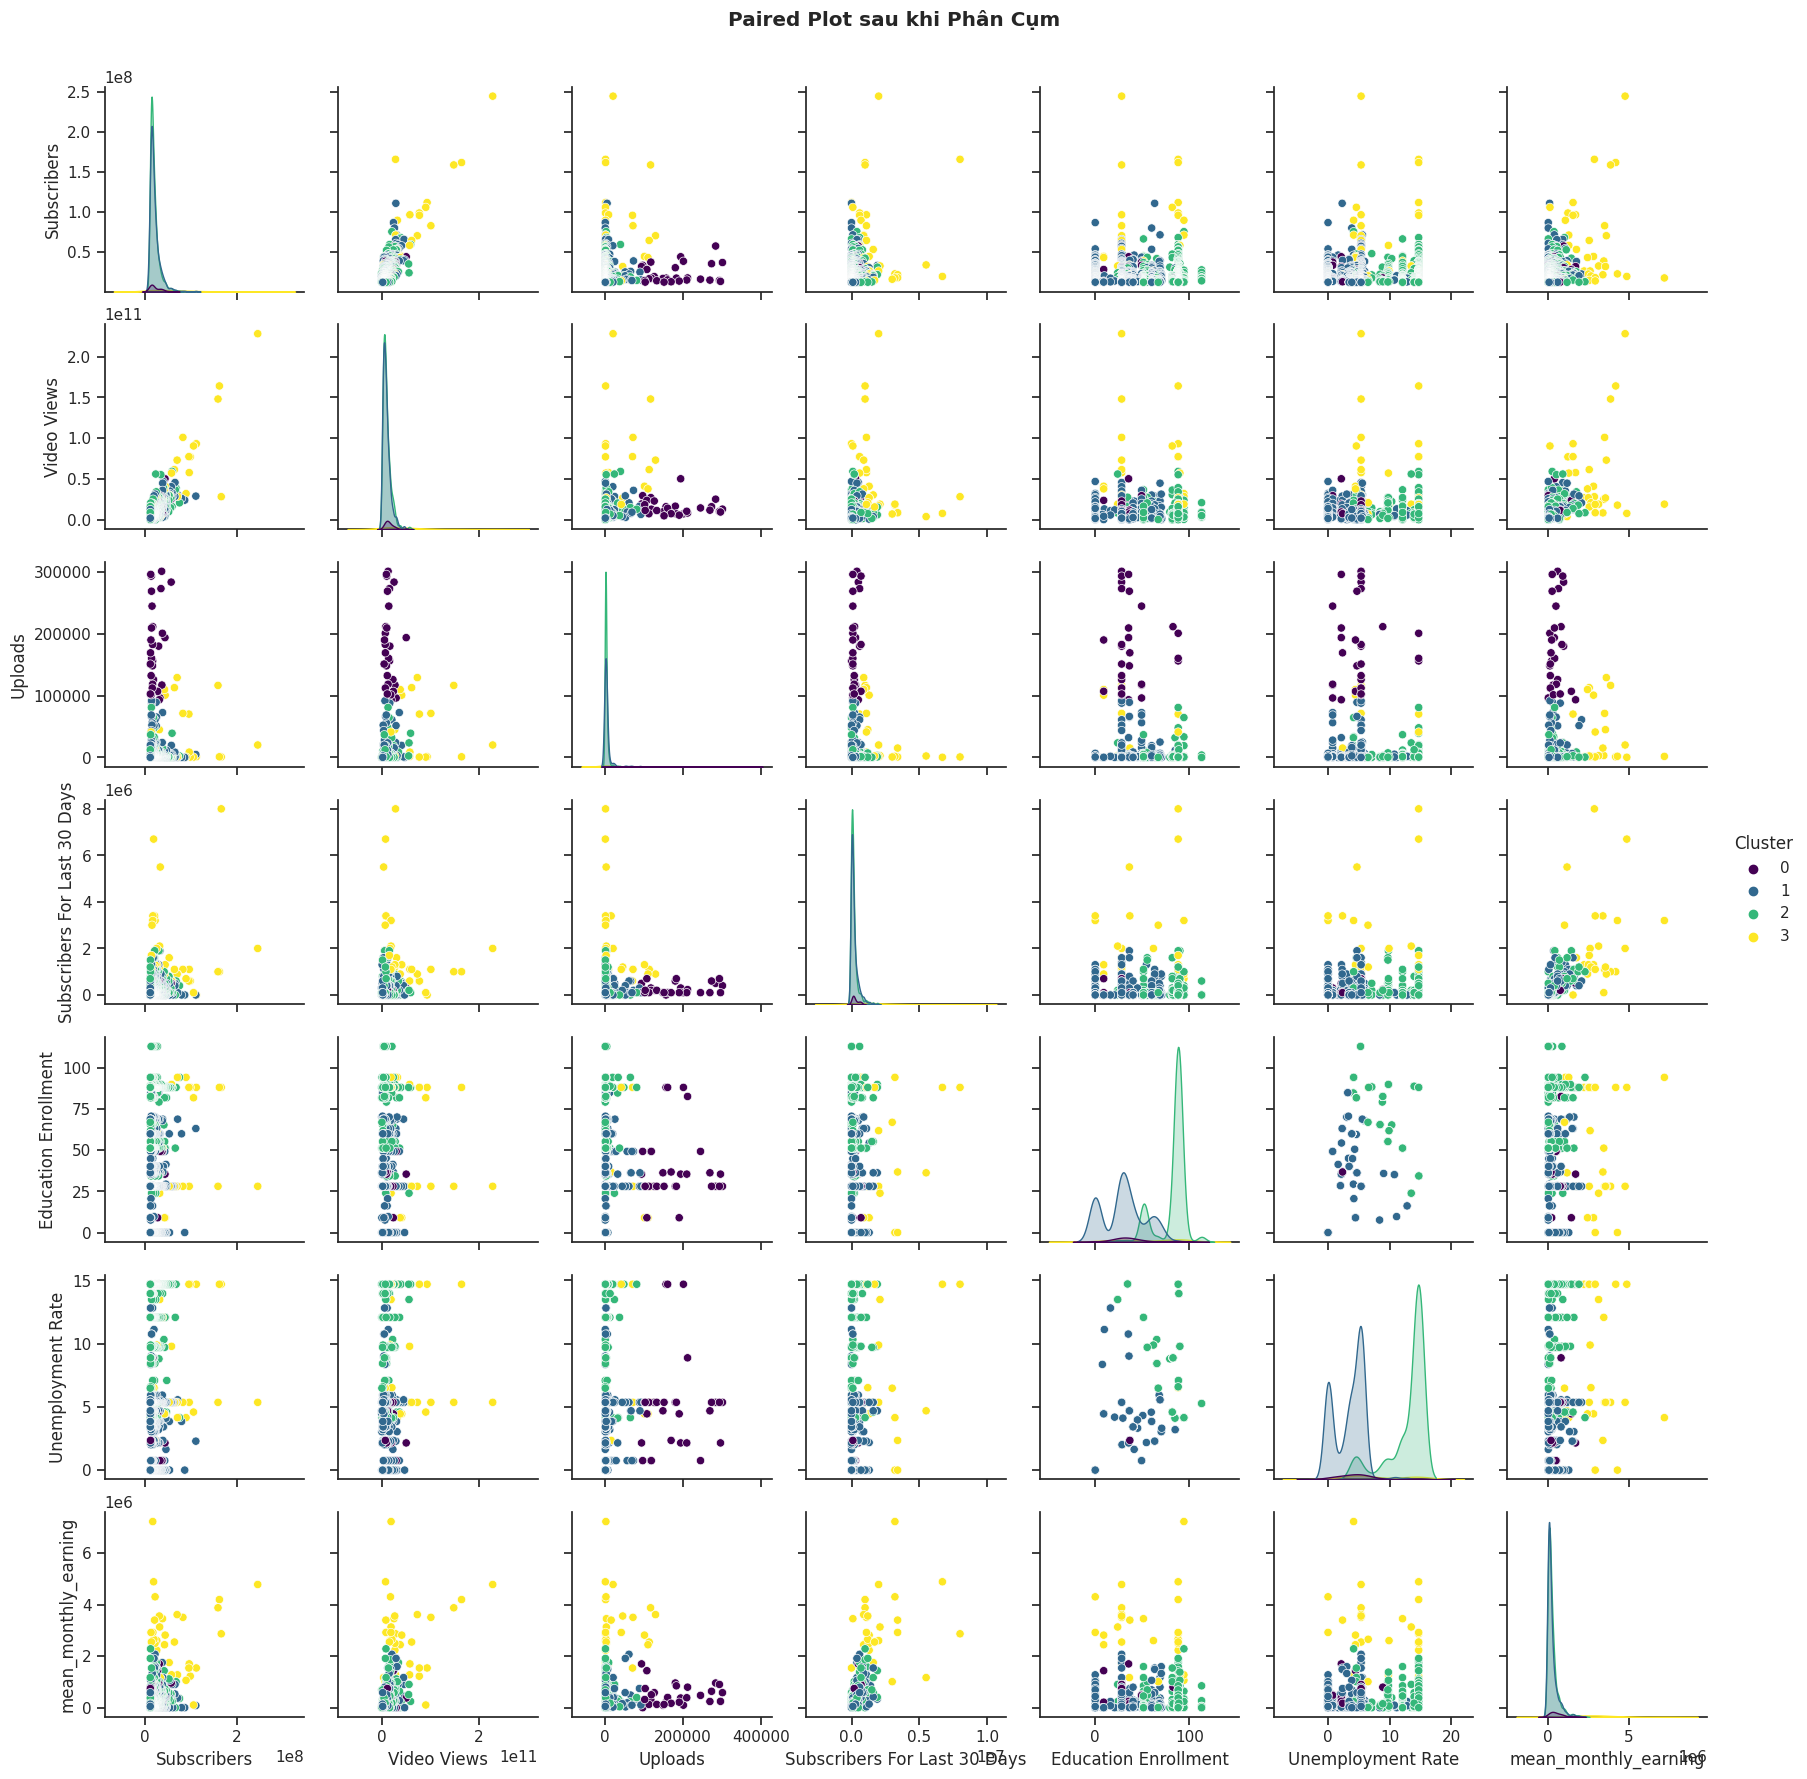

In [ ]:
# Vẽ paired plot cho dữ liệu sau khi phân cụm
plt.figure(figsize=(15, 15))
sns.pairplot(df[numerical_vars + ['Cluster']], hue='Cluster', palette = 'viridis')
plt.suptitle("Paired Plot sau khi Phân Cụm", y=1.02, weight = 'bold')
plt.show()
